# Data processing for ANN 2014-2023 using APX market index data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import minmax_scale, normalize
import seaborn as sn
import datetime
%matplotlib inline

In [2]:
#Importing Machine learning library
import tensorflow as ts

In [3]:
#Importing Machine learning library
from tensorflow import keras

## Importing Power Generation Data

In [4]:
S_Data=pd.read_excel(r"C:/Users/paulo/Downloads/Final_Project/Final_Project/.spyproject/Codes/Generation_sources.xlsx")



In [5]:
S_Data.head(5)

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,2009-01-01 00:00:00+00,8397,15038,7098,272,246,2506,0,0,0,...,7.5,0.0,0.0,0.0,0.0,100,22.7,22.7,1.5,69.8
1,2009-01-01 00:30:00+00,8526,15098,7087,252,245,2485,0,0,0,...,7.4,0.0,0.0,0.0,0.0,100,22.5,22.5,1.5,70.1
2,2009-01-01 01:00:00+00,8493,15083,7073,228,246,2450,0,0,0,...,7.3,0.0,0.0,0.0,0.0,100,22.5,22.5,1.4,70.2
3,2009-01-01 01:30:00+00,8336,15015,7063,212,246,2420,0,0,0,...,7.3,0.0,0.0,0.0,0.0,100,22.6,22.6,1.4,70.1
4,2009-01-01 02:00:00+00,8304,14974,7051,195,246,2349,0,0,0,...,7.1,0.0,0.0,0.0,0.0,100,22.6,22.6,1.3,70.3


In [6]:
#Checking table attributes
S_Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253237 entries, 0 to 253236
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATETIME          253237 non-null  object 
 1   GAS               253237 non-null  int64  
 2   COAL              253237 non-null  int64  
 3   NUCLEAR           253237 non-null  int64  
 4   WIND              253237 non-null  int64  
 5   HYDRO             253237 non-null  int64  
 6   IMPORTS           253237 non-null  int64  
 7   BIOMASS           253237 non-null  int64  
 8   OTHER             253237 non-null  int64  
 9   SOLAR             253237 non-null  int64  
 10  STORAGE           253237 non-null  int64  
 11  GENERATION        253237 non-null  int64  
 12  CARBON_INTENSITY  253237 non-null  int64  
 13  LOW_CARBON        253237 non-null  int64  
 14  ZERO_CARBON       253237 non-null  int64  
 15  RENEWABLE         253237 non-null  int64  
 16  FOSSIL            25

In [7]:
#Renaming columns names with smaller fonts  to improve display

S_Data1=S_Data.rename(columns={'WIND':'Wind generation (MW)','SOLAR':'Solar generation (MW)','HYDRO':'Hydro generation (MW)','BIOMASS':'Biomass generation (MW)'})

In [8]:
#Creating a for loop to convert all columns from float64 to float32, to help machine handling computation

columns_to_convert = ['Hydro generation (MW)', 'Wind generation (MW)', 'Solar generation (MW)','Biomass generation (MW)']

for column in columns_to_convert:
    S_Data1[column] = pd.to_numeric(S_Data1[column], errors='coerce').astype('float32')

In [9]:
#Selecting the chosen features out the dataframe to store in a new variable

Sources_Data= S_Data1.loc[:, ['DATETIME','Wind generation (MW)','Solar generation (MW)','Hydro generation (MW)','Biomass generation (MW)']]

In [10]:
#Converting datetime column into date type to ensure python treat as date values

Sources_Data['DATETIME']=pd.to_datetime(Sources_Data['DATETIME'])

In [11]:
# Removing the timezone information from the datetime column

Sources_Data['DATETIME'] = Sources_Data['DATETIME'].dt.tz_localize(None)

In [12]:
#Checking the first 10 elements of the dataframe to ensure there are no errors 

Sources_Data.head(10)

,DATETIME,Wind generation (MW),Solar generation (MW),Hydro generation (MW),Biomass generation (MW)
0,2009-01-01 00:00:00,272.0,0.0,246.0,0.0
1,2009-01-01 00:30:00,252.0,0.0,245.0,0.0
2,2009-01-01 01:00:00,228.0,0.0,246.0,0.0
3,2009-01-01 01:30:00,212.0,0.0,246.0,0.0
4,2009-01-01 02:00:00,195.0,0.0,246.0,0.0
5,2009-01-01 02:30:00,184.0,0.0,236.0,0.0
6,2009-01-01 03:00:00,180.0,0.0,226.0,0.0
7,2009-01-01 03:30:00,170.0,0.0,225.0,0.0
8,2009-01-01 04:00:00,160.0,0.0,225.0,0.0
9,2009-01-01 04:30:00,153.0,0.0,224.0,0.0


#### Selecting data from 2014 to 2023

In [13]:
#Choosing time range start and end

sd_start= ('2014-01-01 00:00:00')
sd_end= ('2023-01-01 23:30:00')

In [14]:
#Converting datetime column into date type to ensure python treat as date values

Sources2014_2023 = Sources_Data[(Sources_Data['DATETIME'] >= sd_start) & (Sources_Data['DATETIME']<= sd_end)]

In [15]:
# Checking and Counting the null values per column

n_mask=Sources2014_2023.isnull()
num_nan_per_col= n_mask.sum()
print("Number of NaN values per column:")
print(num_nan_per_col)

Number of NaN values per column:
DATETIME                   0
Wind generation (MW)       0
Solar generation (MW)      0
Hydro generation (MW)      0
Biomass generation (MW)    0
dtype: int64


In [16]:
#Checking the first 10 elements of the dataframe to ensure there are no errors

Sources2014_2023.tail(10)

,DATETIME,Wind generation (MW),Solar generation (MW),Hydro generation (MW),Biomass generation (MW)
245462,2023-01-01 19:00:00,7396.0,0.0,1028.0,1432.0
245463,2023-01-01 19:30:00,7040.0,0.0,856.0,1435.0
245464,2023-01-01 20:00:00,7005.0,0.0,785.0,1430.0
245465,2023-01-01 20:30:00,6912.0,0.0,730.0,1420.0
245466,2023-01-01 21:00:00,6660.0,0.0,547.0,1415.0
245467,2023-01-01 21:30:00,6420.0,0.0,529.0,1408.0
245468,2023-01-01 22:00:00,6095.0,0.0,501.0,1415.0
245469,2023-01-01 22:30:00,5614.0,0.0,520.0,1420.0
245470,2023-01-01 23:00:00,4856.0,0.0,488.0,1352.0
245471,2023-01-01 23:30:00,4617.0,0.0,453.0,1267.0


In [17]:
#Checking the lentgh of the dataframe

len(Sources2014_2023)

157824

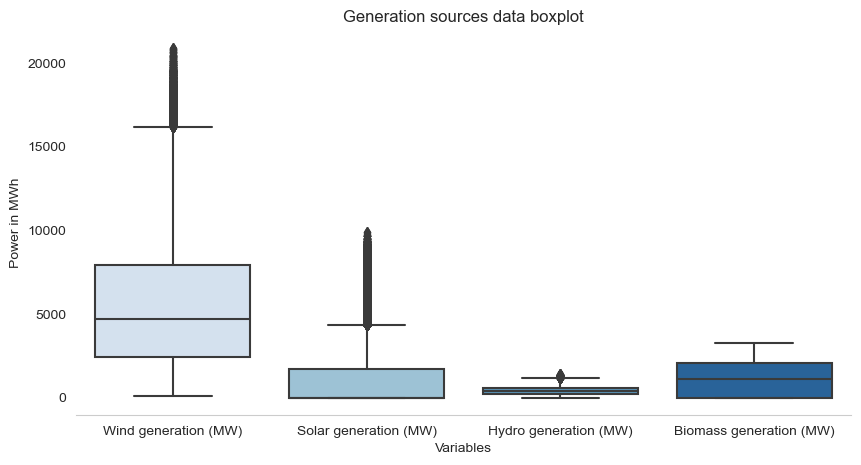

In [18]:
#plotting boxplot of generation sources data 

plt.figure(figsize=(10, 5))
sn.set_style("whitegrid")
sn.boxplot(data=Sources2014_2023,palette='Blues')
sn.despine(left=True)
plt.title('Generation sources data boxplot')
plt.grid(False)
plt.xlabel('Variables')
plt.ylabel('Power in MWh')
plt.savefig("random.jpg", facecolor="k")
plt.show()

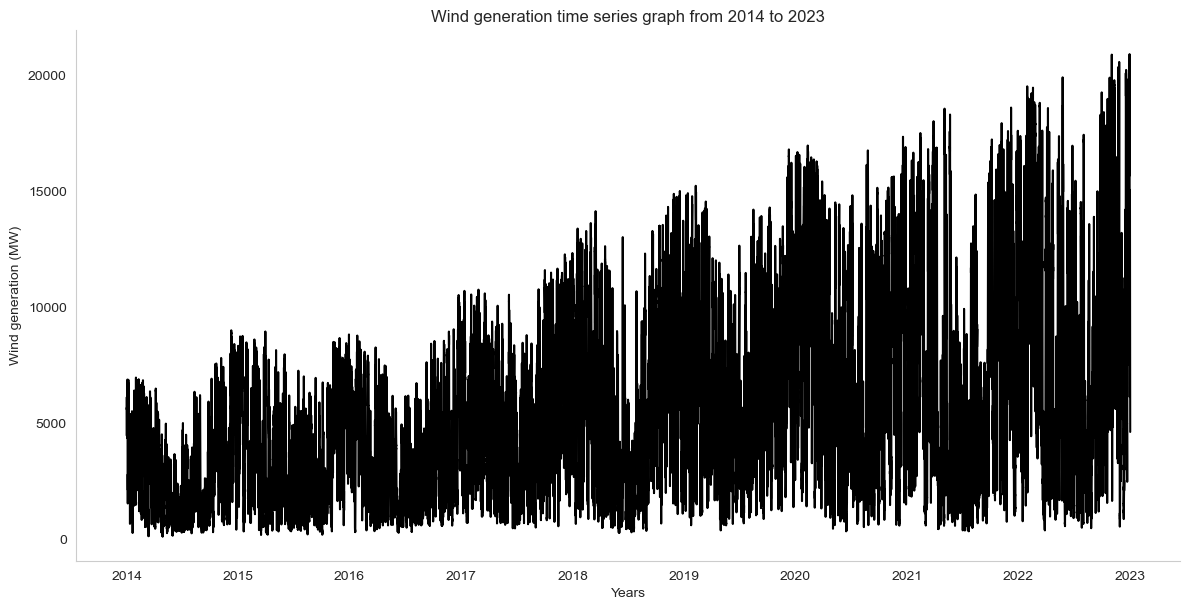

In [19]:
#Plotting time series of variable wind using relplot from seaborn library

sn.relplot(data=Sources2014_2023, x="DATETIME", y="Wind generation (MW)", kind="line",height=6, aspect=2,color='black')
plt.title('Wind generation time series graph from 2014 to 2023')
plt.xlabel('Years')
plt.grid(False)
plt.ylabel('Wind generation (MW)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

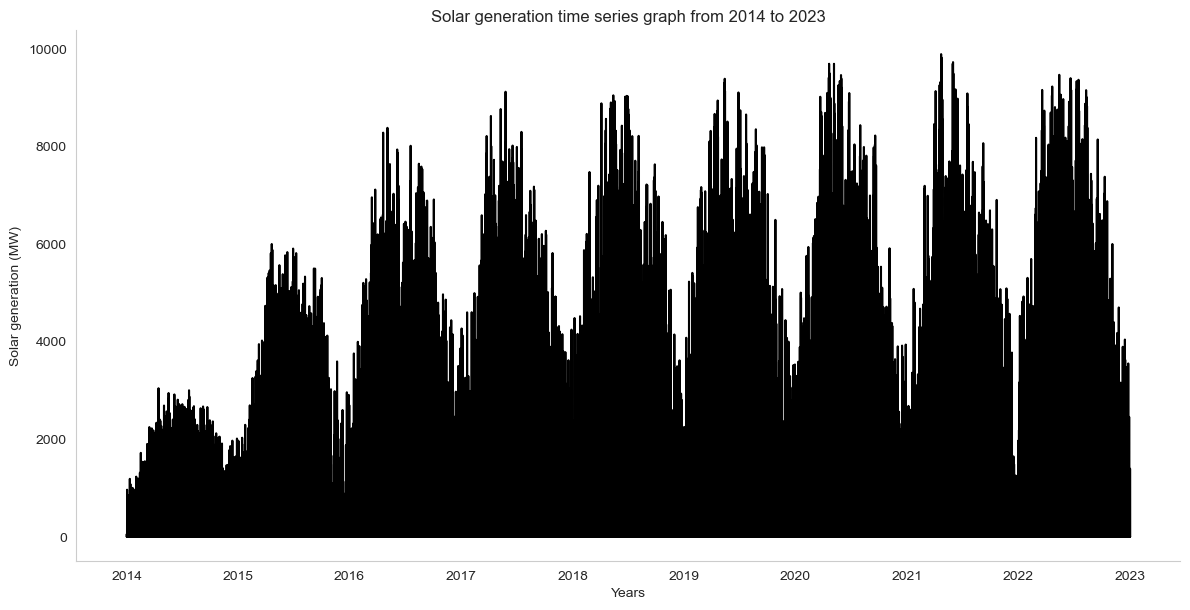

In [20]:
#Plotting time series of variable solar using relplot from seaborn library

sn.relplot(data=Sources2014_2023, x="DATETIME", y="Solar generation (MW)", kind="line",height=6, aspect=2,color='black')
plt.title('Solar generation time series graph from 2014 to 2023')
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('Solar generation (MW)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

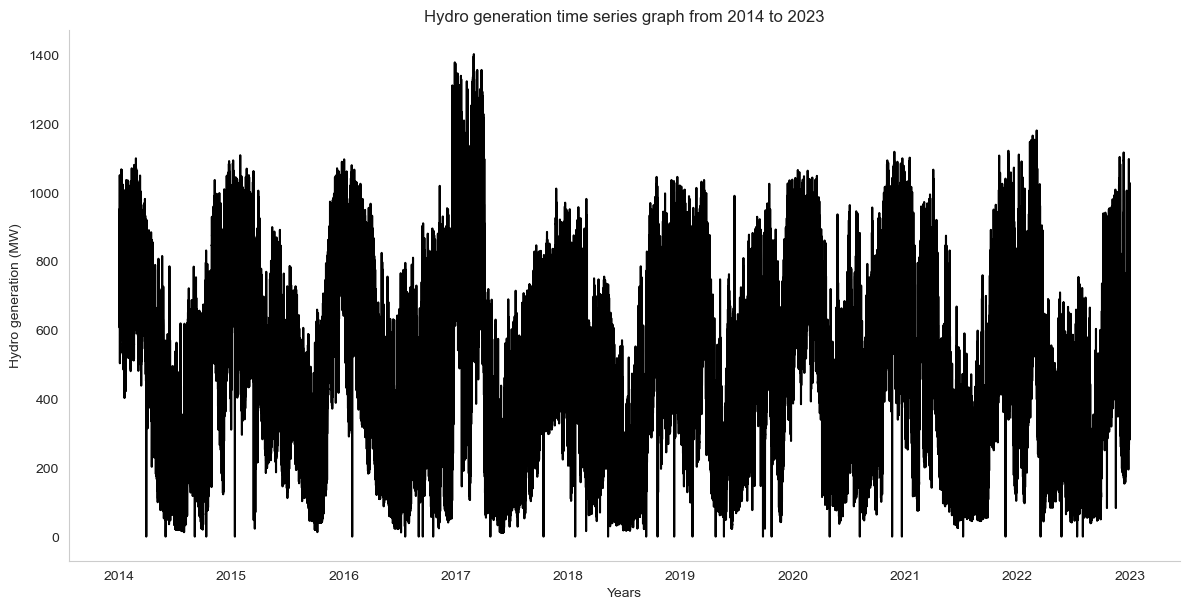

In [21]:
#Plotting time series of variable Hydro using relplot from seaborn library

sn.relplot(data=Sources2014_2023, x="DATETIME", y="Hydro generation (MW)", kind="line",height=6, aspect=2,color='black')
plt.title('Hydro generation time series graph from 2014 to 2023')
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('Hydro generation (MW)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

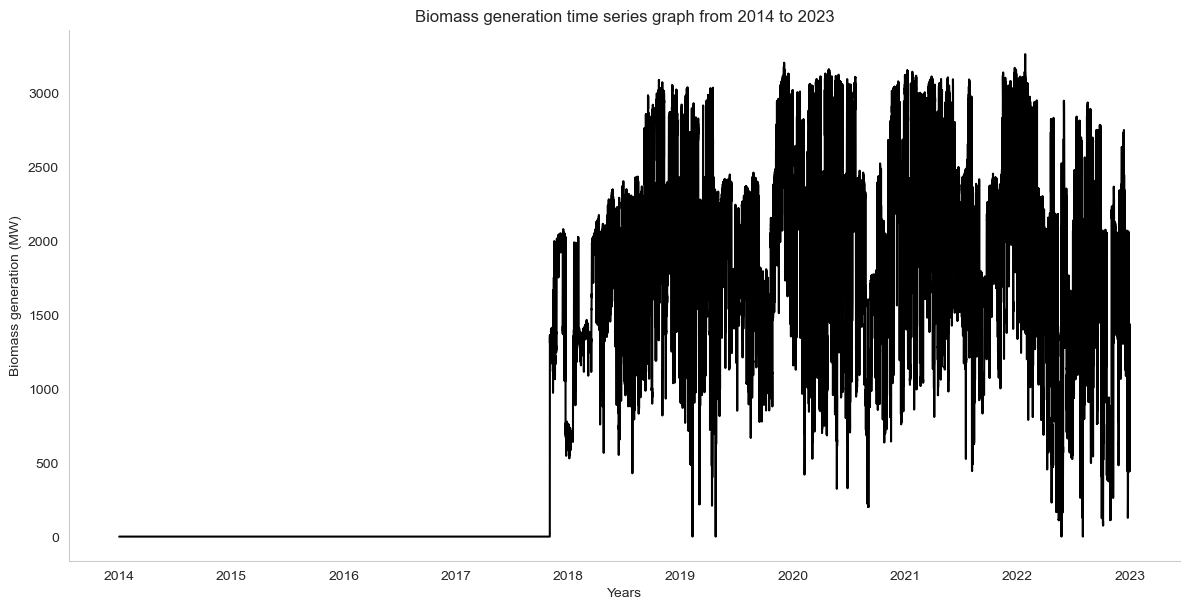

In [22]:
#Plotting time series of variable Biomass using relplot from seaborn library

sn.relplot(data=Sources2014_2023, x="DATETIME", y="Biomass generation (MW)", kind="line",height=6, aspect=2,color='black')
plt.title('Biomass generation time series graph from 2014 to 2023')
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('Biomass generation (MW)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

In [23]:
#Defining a function to plot weeks per month line plots for variables on generation sources dataframe

def plot_graph_for_sources(x_col, y_col, year, month,figsize = (10,8)):
   
    # Filtering the data for the specified year and month
    data_month = Sources2014_2023[(Sources2014_2023[x_col].dt.year == year) & (Sources2014_2023[x_col].dt.month == month)]

  
    # Funtion to Plot the graph
    sn.relplot(x=data_month[x_col], y=data_month[y_col],kind="line",color='black',height=6, aspect=2.5)

    # Setting plot title and axis labels
    
    plt.title(f'Time series of weeks for month {month} of {year}')
    plt.grid(False)
    plt.xlabel('Years')
    plt.ylabel(y_col)
    plt.savefig("random.jpg", facecolor="k")

    # Displaying the plot
    plt.show()

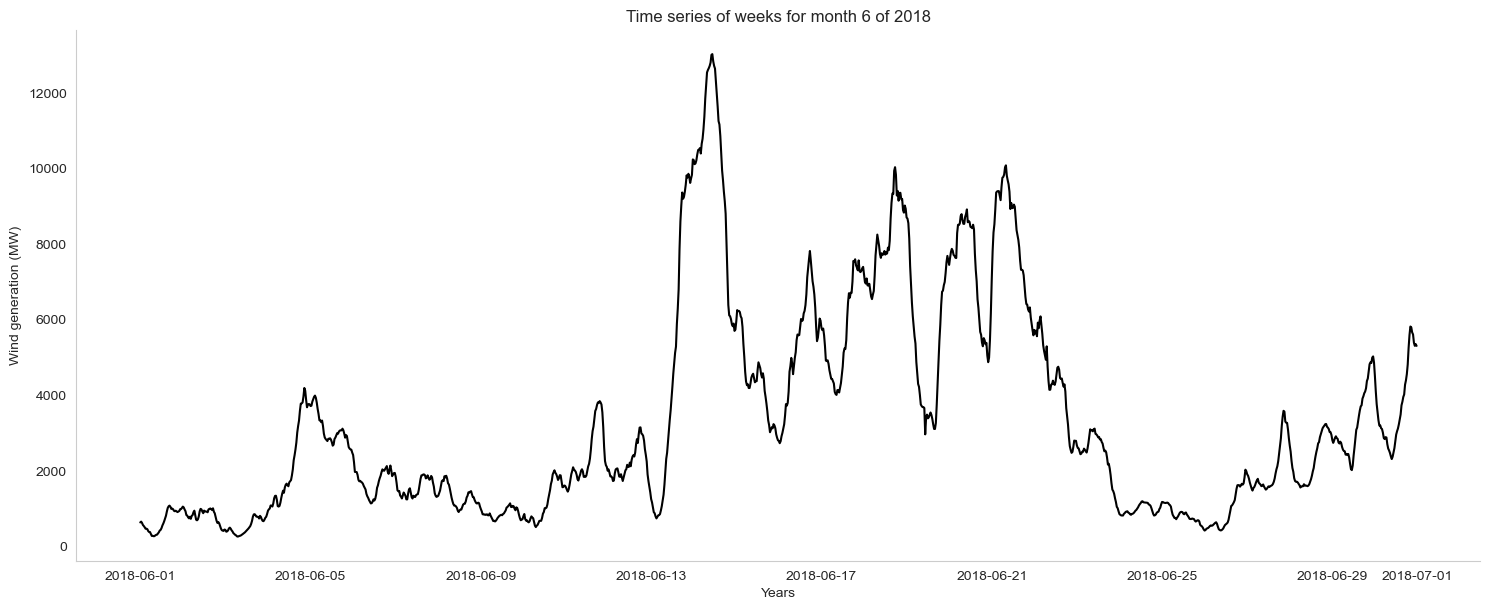

In [24]:
#Calling the funtion defined for sources to plot with chosen variable

plot_graph_for_sources('DATETIME', 'Wind generation (MW)',2018, 6)

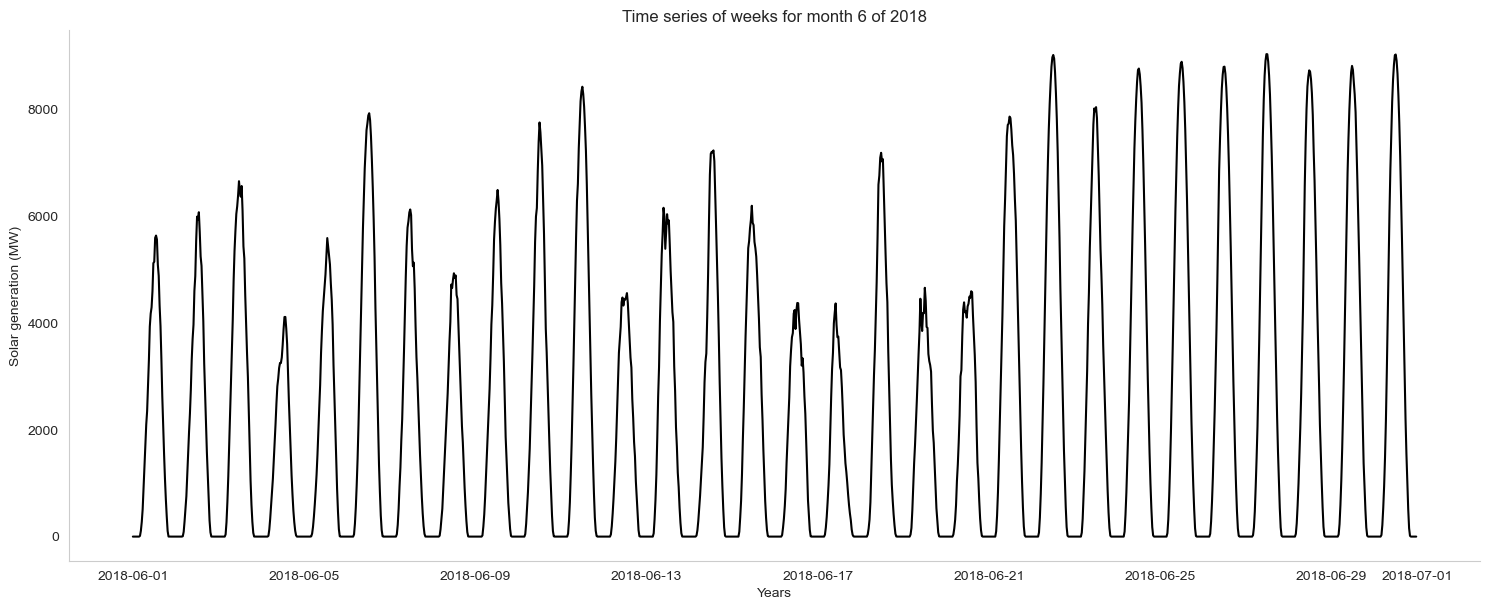

In [25]:
#Calling the funtion defined for sources to plot with chosen variable

plot_graph_for_sources('DATETIME', 'Solar generation (MW)', 2018, 6)

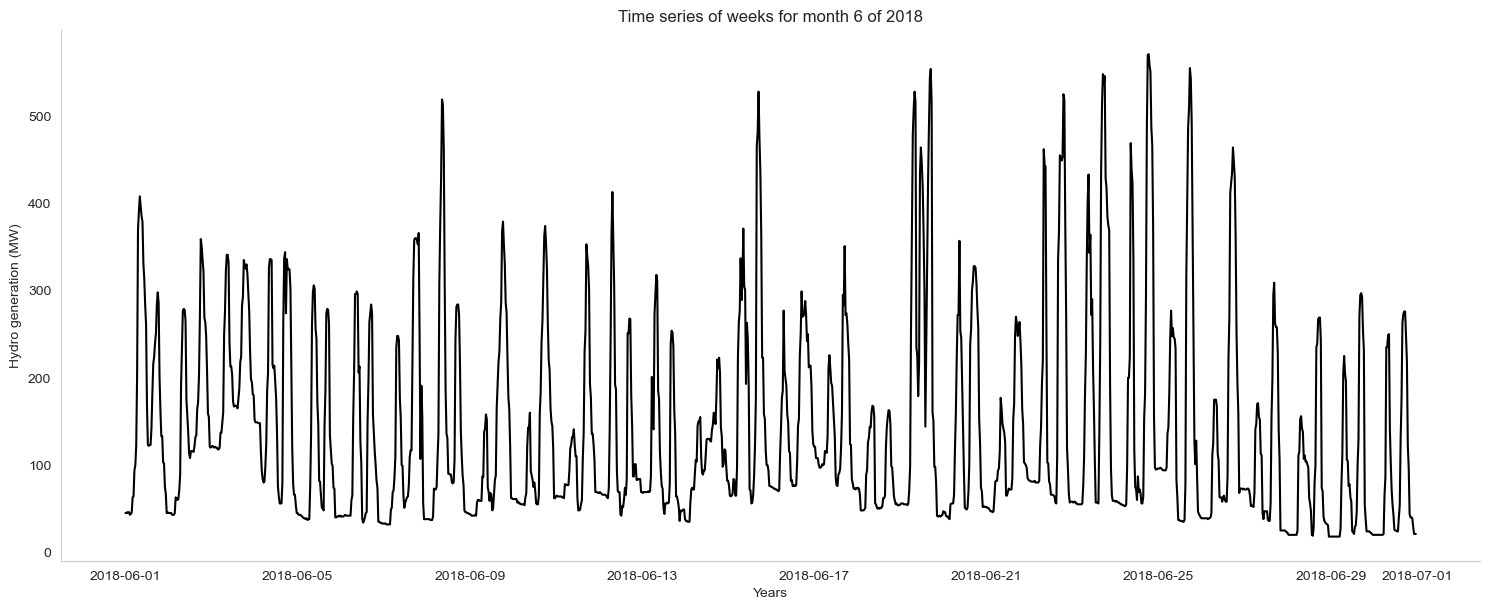

In [26]:
#Calling the funtion defined for sources to plot with chosen variable

plot_graph_for_sources('DATETIME', 'Hydro generation (MW)', 2018, 6)

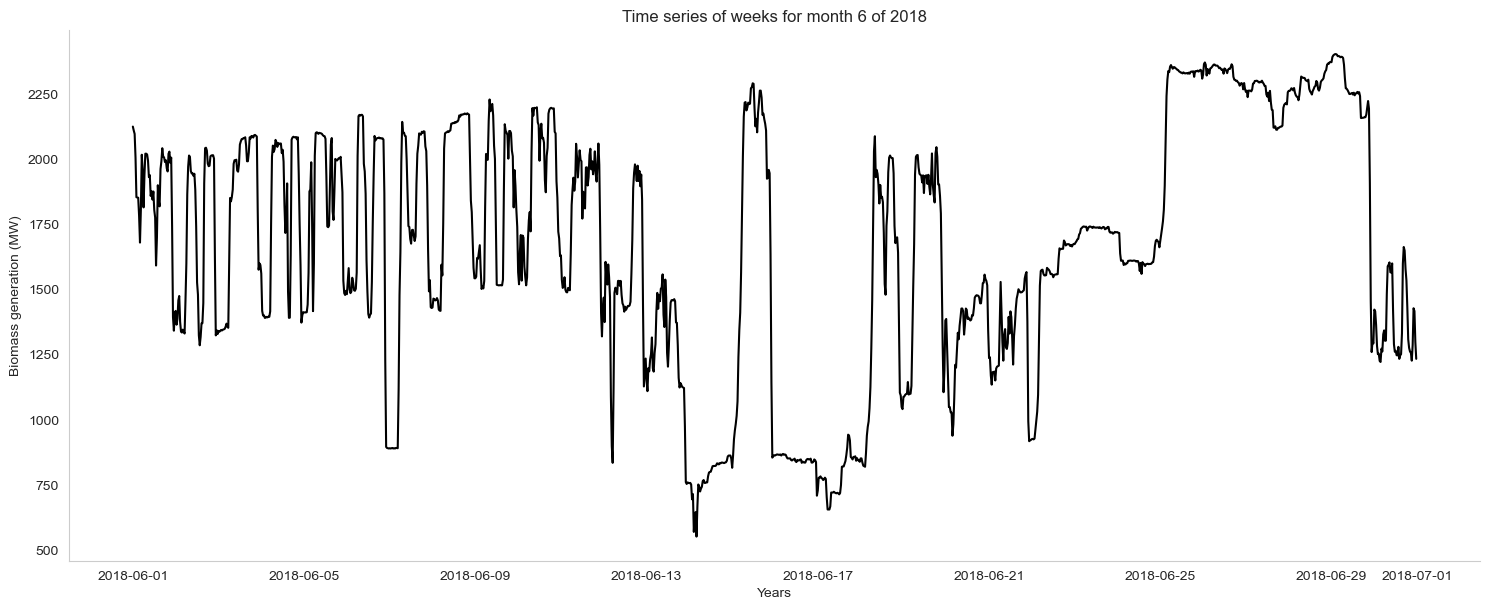

In [27]:
#Calling the funtion defined for sources to plot with chosen variable

plot_graph_for_sources('DATETIME', 'Biomass generation (MW)', 2018, 6)

##### Ploting the power sources time series

## Importing Electricity Demand Data & Embbeded Generation

### Connecting SQL DATABASE

In [28]:
import mysql.connector
from mysql.connector import Error

In [29]:
config = {
  'user': 'root',
  'password': 'Aaliyah082520',
  'host': 'localhost',
  'database': 'project_final',
    'port':'3306',
    'auth_plugin':"mysql_native_password"}

In [30]:
mysql_connection = mysql.connector.connect(**config)

### Loading Power Demand Data

In [31]:
Demand_data = pd.read_sql('SELECT * from demanddata' , con=mysql_connection)



C:\Users\paulo\AppData\Local\Temp\ipykernel_12592\3199891446.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Demand_data = pd.read_sql('SELECT * from demanddata' , con=mysql_connection)


In [32]:
#Checking the last elements of the dataframe to ensure there are no errors

Demand_data.tail()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
165305,2023-06-06,44,26340,27858,24082,1068,6538,0,13081,0,6,809,976,-408,-451,-153,299,None,None
165306,2023-06-06,45,25092,26896,22909,1065,6538,0,13081,0,6,517,951,-624,-386,-33,-255,None,None
165307,2023-06-06,46,24060,25928,21921,1062,6538,0,13081,0,6,501,941,-624,-446,-10,-282,None,None
165308,2023-06-06,47,22590,24258,20574,1046,6538,0,13081,0,6,531,662,-561,-452,-76,-73,None,None
165309,2023-06-06,48,21355,23166,19439,1029,6538,0,13081,0,6,531,640,-559,-452,-228,-66,None,None


In [33]:
#Checking table atributtes

Demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165310 entries, 0 to 165309
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   SETTLEMENT_DATE            165310 non-null  datetime64[ns]
 1   SETTLEMENT_PERIOD          165310 non-null  object        
 2   ND                         165310 non-null  object        
 3   TSD                        165310 non-null  object        
 4   ENGLAND_WALES_DEMAND       165310 non-null  object        
 5   EMBEDDED_WIND_GENERATION   165310 non-null  object        
 6   EMBEDDED_WIND_CAPACITY     165310 non-null  object        
 7   EMBEDDED_SOLAR_GENERATION  165310 non-null  object        
 8   EMBEDDED_SOLAR_CAPACITY    165310 non-null  object        
 9   NON_BM_STOR                165310 non-null  object        
 10  PUMP_STORAGE_PUMPING       165310 non-null  object        
 11  IFA_FLOW                   165310 non-null  object  

In [34]:
#Renaming columns names with smaller fonts  to improve display

Demand_data1=Demand_data.rename(columns={'SETTLEMENT_PERIOD':'Settlement Period','EMBEDDED_SOLAR_GENERATION':'Embbeded solar generation (MW)','EMBEDDED_WIND_GENERATION':'Embbeded wind generation (MW)','SETTLEMENT_DATE':'Settlement date','ND':'National demand (MW)','TSD':'Total system demand (MW)'})

In [35]:
#Creating a for loop to convert all columns from float64 to float32, to help machine handling computation

columns_to_convert = ['Embbeded solar generation (MW)','Embbeded wind generation (MW)','National demand (MW)','Total system demand (MW)']

for column in columns_to_convert:
    Demand_data1[column] = pd.to_numeric(Demand_data1[column], errors='coerce').astype('float32')

In [36]:
#Selecting the chosen features out of the dataframe to store in a new variable

Demand_data1a=Demand_data1.loc[:,['Settlement date','Settlement Period','National demand (MW)','Embbeded solar generation (MW)','Embbeded wind generation (MW)','Total system demand (MW)']]

In [37]:
#Converting columns form object type to string and integer 

Demand_data1a['Settlement date']=Demand_data1a['Settlement date'].astype(str)
Demand_data1a['Settlement Period']=pd.to_numeric(Demand_data1a['Settlement Period'],errors='coerce').astype('Int64')

In [38]:
#Checking the table to see the new converted columns

Demand_data1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165310 entries, 0 to 165309
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Settlement date                 165310 non-null  object 
 1   Settlement Period               165310 non-null  Int64  
 2   National demand (MW)            165310 non-null  float32
 3   Embbeded solar generation (MW)  165310 non-null  float32
 4   Embbeded wind generation (MW)   165310 non-null  float32
 5   Total system demand (MW)        165310 non-null  float32
dtypes: Int64(1), float32(4), object(1)
memory usage: 5.2+ MB


In [39]:
#Importing library that will allow to create new Datetime column 
from datetime import datetime

#Applying new date format using lambda function to a columns

Demand_data1a['date']=Demand_data1a['Settlement date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
Demand_data1a['Time Interval'] = (Demand_data1a['Settlement Period']-1) * 30

Demand_data1a['date'] = Demand_data1a['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
import datetime
Demand_data1a['Time Format'] = Demand_data1a['Time Interval'].apply(lambda x:(datetime.datetime.min + datetime.timedelta(minutes=x)).time())

In [40]:
#Creating new datetime column with new format using lambda function

Demand_data1a['Time Format'] = Demand_data1a['Time Format'].apply(lambda x: x.strftime('%H:%M:%S'))
Demand_data1a['DATETIME'] = pd.to_datetime(Demand_data1a['date'] + ' ' + Demand_data1a['Time Format'])
Demand_data1a['Time Format'] = Demand_data1a['Time Interval'].apply(lambda x:(datetime.datetime.min + datetime.timedelta(minutes=x)).time())

In [41]:
#Creating new variable by grouping features of the dataframe using the new datime column as ID column

Demand_dataf = Demand_data1a.groupby('DATETIME').agg({'Settlement Period': 'first',
                                                   'National demand (MW)': 'sum', 
                                                   'Embbeded wind generation (MW)': 'sum',
                                                   'Embbeded solar generation (MW)': 'sum',  
                                                   'Total system demand (MW)': 'sum'}).reset_index()

In [42]:
#Checking the first 10 element for the newly created dataframe.

Demand_dataf.head(10)

,DATETIME,Settlement Period,National demand (MW),Embbeded wind generation (MW),Embbeded solar generation (MW),Total system demand (MW)
0,2014-01-01 00:00:00,1,30008.0,1084.0,0.0,31920.0
1,2014-01-01 00:30:00,2,30589.0,1079.0,0.0,32491.0
2,2014-01-01 01:00:00,3,30306.0,1079.0,0.0,32521.0
3,2014-01-01 01:30:00,4,29280.0,931.0,0.0,31735.0
4,2014-01-01 02:00:00,5,28174.0,931.0,0.0,30661.0
5,2014-01-01 02:30:00,6,27456.0,994.0,0.0,29992.0
6,2014-01-01 03:00:00,7,26391.0,994.0,0.0,28888.0
7,2014-01-01 03:30:00,8,25367.0,950.0,0.0,27786.0
8,2014-01-01 04:00:00,9,24500.0,950.0,0.0,26798.0
9,2014-01-01 04:30:00,10,23943.0,963.0,0.0,26264.0


#### Selecting data from 2014 to 2023

In [43]:
#Choosing time range start and end
dd_start =pd.to_datetime('2014-01-01 00:00:00')
dd_end = pd.to_datetime('2023-01-01 23:30:00')

#Creating an new dataframe using datetime and time range boundaries
Demand2014_2023 = Demand_dataf[(Demand_dataf['DATETIME'] >= dd_start) & (Demand_dataf['DATETIME']<= dd_end)]

In [44]:
#Checking the first 10 element for the newly created dataframe.
Demand2014_2023.head(10)

,DATETIME,Settlement Period,National demand (MW),Embbeded wind generation (MW),Embbeded solar generation (MW),Total system demand (MW)
0,2014-01-01 00:00:00,1,30008.0,1084.0,0.0,31920.0
1,2014-01-01 00:30:00,2,30589.0,1079.0,0.0,32491.0
2,2014-01-01 01:00:00,3,30306.0,1079.0,0.0,32521.0
3,2014-01-01 01:30:00,4,29280.0,931.0,0.0,31735.0
4,2014-01-01 02:00:00,5,28174.0,931.0,0.0,30661.0
5,2014-01-01 02:30:00,6,27456.0,994.0,0.0,29992.0
6,2014-01-01 03:00:00,7,26391.0,994.0,0.0,28888.0
7,2014-01-01 03:30:00,8,25367.0,950.0,0.0,27786.0
8,2014-01-01 04:00:00,9,24500.0,950.0,0.0,26798.0
9,2014-01-01 04:30:00,10,23943.0,963.0,0.0,26264.0


In [45]:
# Checking and Counting the null values per column

n_mask1=Demand2014_2023.isnull()
num_nan_per_col1= n_mask1.sum()
print("Number of NaN values per column:")
print(num_nan_per_col1)

Number of NaN values per column:
DATETIME                          0
Settlement Period                 0
National demand (MW)              0
Embbeded wind generation (MW)     0
Embbeded solar generation (MW)    0
Total system demand (MW)          0
dtype: int64


In [46]:
#Checking length of the data

len(Demand2014_2023)

157530

In [47]:
#Creating a new datframe by dropping two columns and storing the value in a new variable

Demand2014_2023n=Demand2014_2023.drop(['National demand (MW)','Settlement Period'], axis=1)

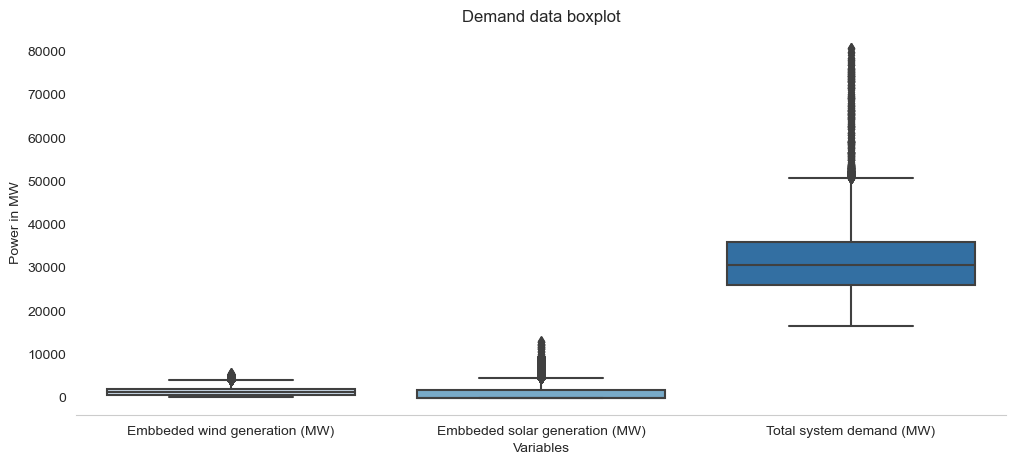

In [48]:
#Plotting a boxplot of demand data

plt.figure(figsize=(12, 5))
sn.set_style("whitegrid")
sn.boxplot(data=Demand2014_2023n,palette="Blues")
sn.despine(left=True)
plt.title('Demand data boxplot')
plt.grid(False)
plt.xlabel('Variables')
plt.ylabel('Power in MW')
plt.savefig("random.jpg", facecolor="k")
plt.show()

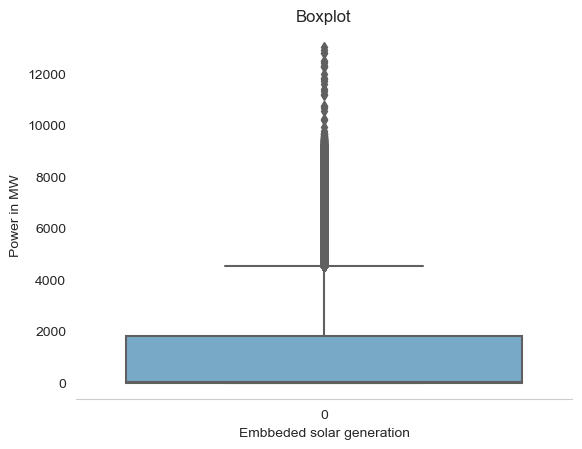

In [49]:
#Plotting a boxplot of individual variable of demand data

sn.set_style("whitegrid")
sn.boxplot(data=Demand2014_2023['Embbeded solar generation (MW)'],palette="Blues")
sn.despine(left=True)
plt.title('Boxplot')
plt.grid(False)
plt.xlabel('Embbeded solar generation')
plt.ylabel('Power in MW')
plt.savefig("random.jpg", facecolor="k")
plt.show()

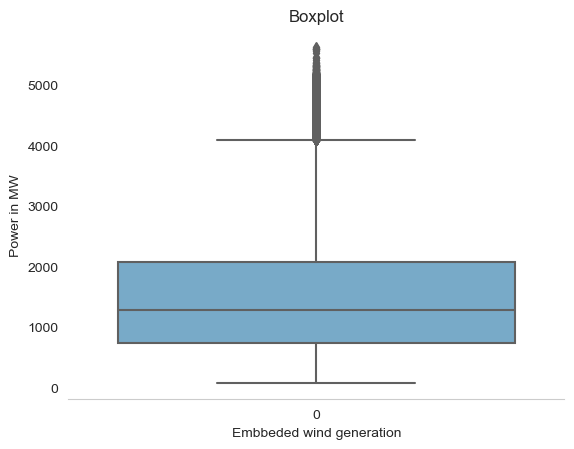

In [50]:
#Plotting a boxplot of individual variable of demand data

sn.set_style("whitegrid")
sn.boxplot(data=Demand2014_2023['Embbeded wind generation (MW)'],palette="Blues")
sn.despine(left=True)
plt.title('Boxplot')
plt.grid(False)
plt.xlabel('Embbeded wind generation')
plt.ylabel('Power in MW')
plt.savefig("random.jpg", facecolor="k")
plt.show()

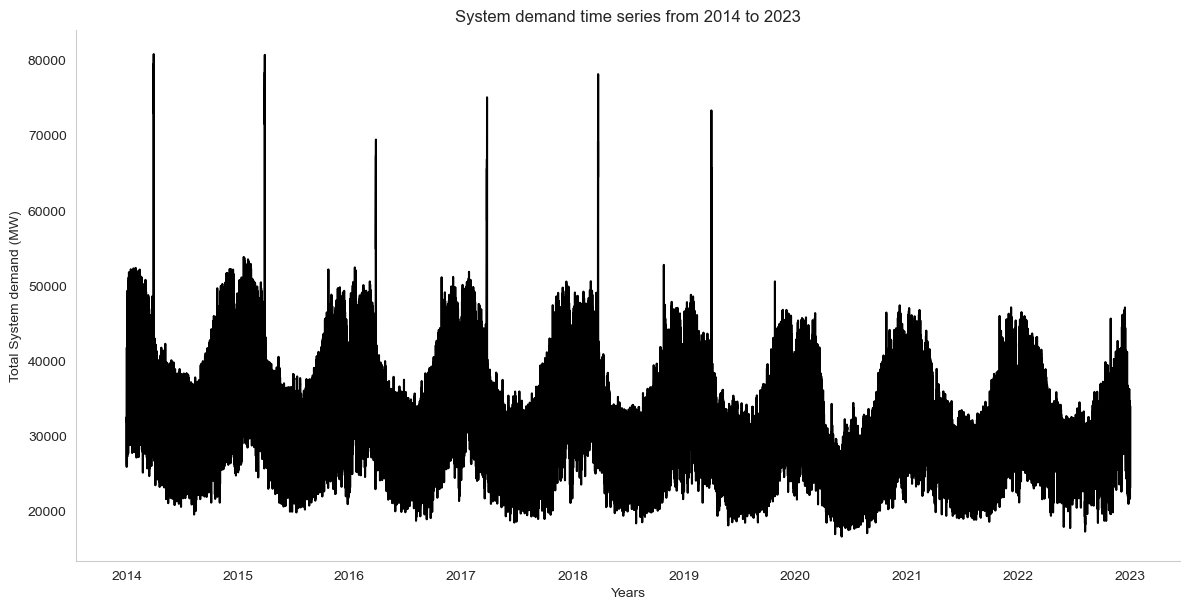

In [51]:
#Plotting time series of variable of demand data using relplot from seaborn library

sn.relplot(data=Demand2014_2023, x="DATETIME", y="Total system demand (MW)", kind="line",height=6, aspect=2,color='black')
plt.title('System demand time series from 2014 to 2023')
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('Total System demand (MW)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

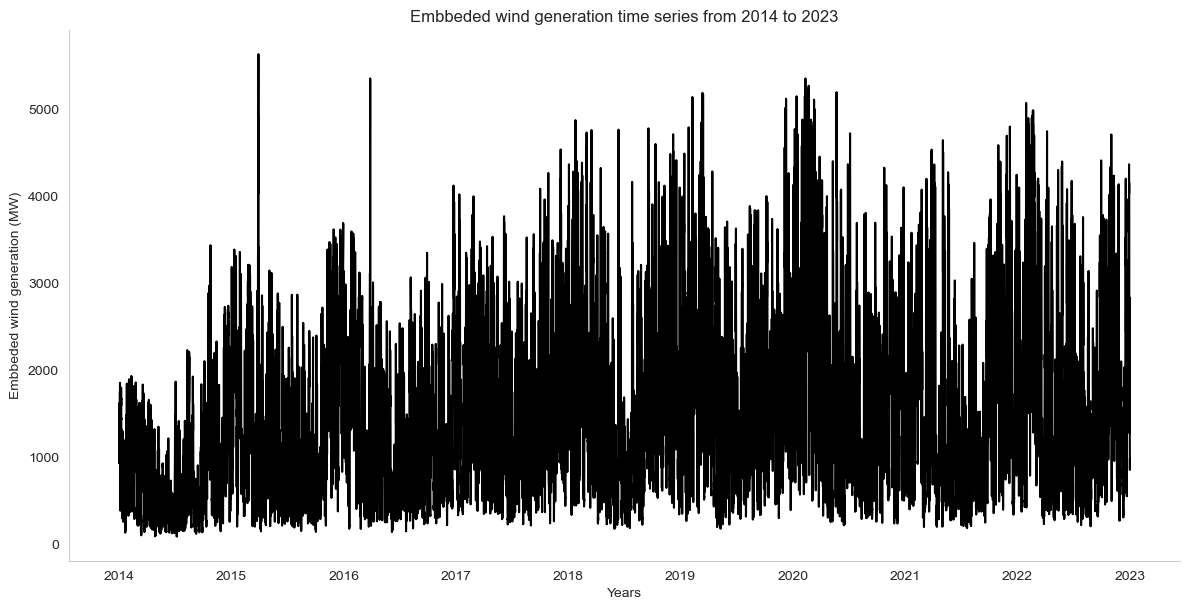

In [52]:
#Plotting time series of variable of demand data using relplot from seaborn library

sn.relplot(data=Demand2014_2023, x="DATETIME", y="Embbeded wind generation (MW)", kind="line",height=6, aspect=2,color='black')
plt.title('Embbeded wind generation time series from 2014 to 2023')
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('Embbeded wind generation (MW)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

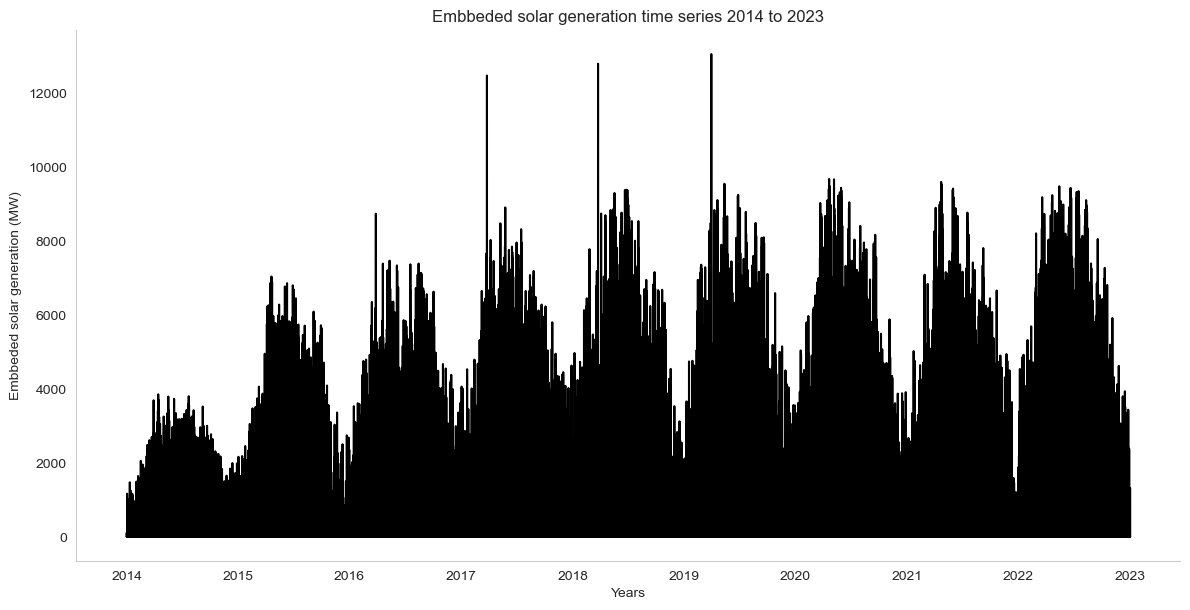

In [53]:
#Plotting time series of variable of demand data using relplot from seaborn library

sn.relplot(data=Demand2014_2023, x="DATETIME", y="Embbeded solar generation (MW)", kind="line",height=6, aspect=2,color='black')
plt.title('Embbeded solar generation time series 2014 to 2023')
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('Embbeded solar generation (MW)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

In [54]:
#Defining a function to plot weeks per month line plots for variables on demand dataframe

def plot_graph_for_demand(x_col, y_col, year, month):
   
    # Filter the data for the specified year and month
    data_month = Demand2014_2023[(Demand2014_2023[x_col].dt.year == year) & (Demand2014_2023[x_col].dt.month == month)]

    

    # Plotting the graph
    sn.relplot(x=data_month[x_col], y=data_month[y_col],kind="line",color='black',height=6, aspect=2.5,errorbar=None,)

    # Setting plot title and axis labels
    
    plt.title(f'Time series of weeks for month {month} of {year}')
    plt.grid(False)
    plt.xlabel('Years')
    plt.ylabel(y_col)
    plt.savefig("random.jpg", facecolor="k")

    # Display the plot
    plt.show()

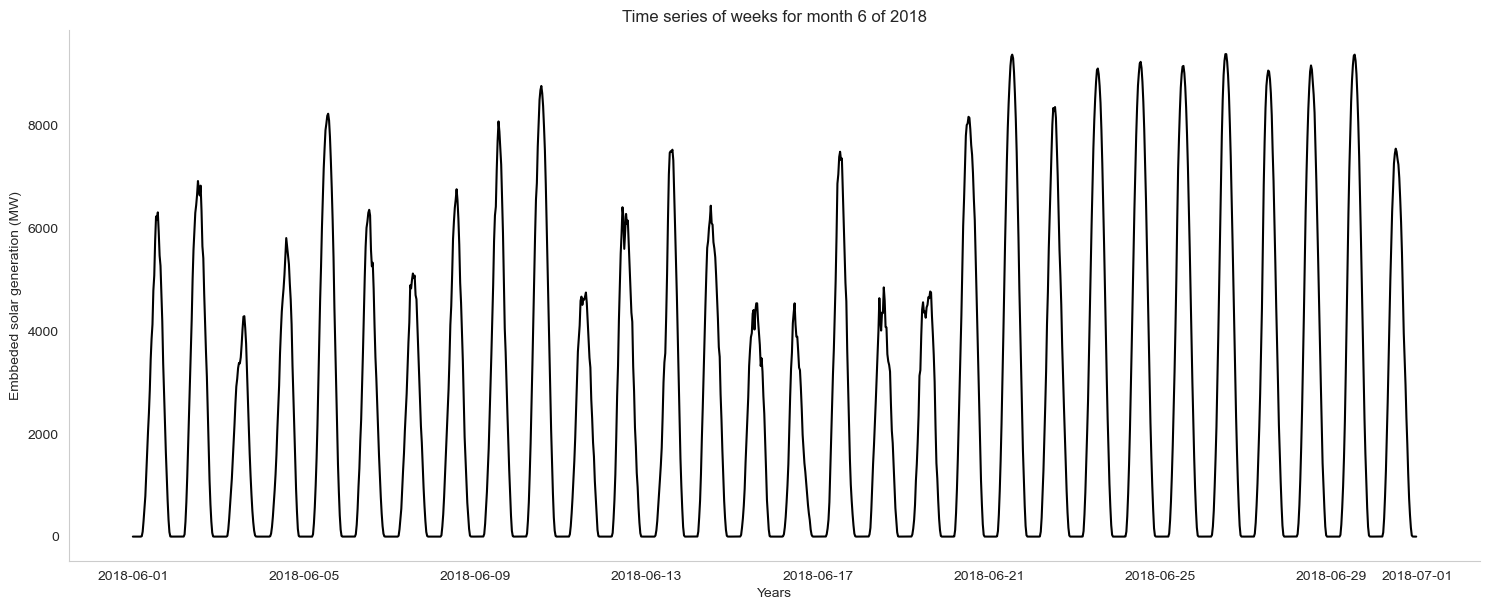

In [55]:
#Calling the funtion defined for demand to plot with chosen variable

plot_graph_for_demand('DATETIME','Embbeded solar generation (MW)',2018,6)

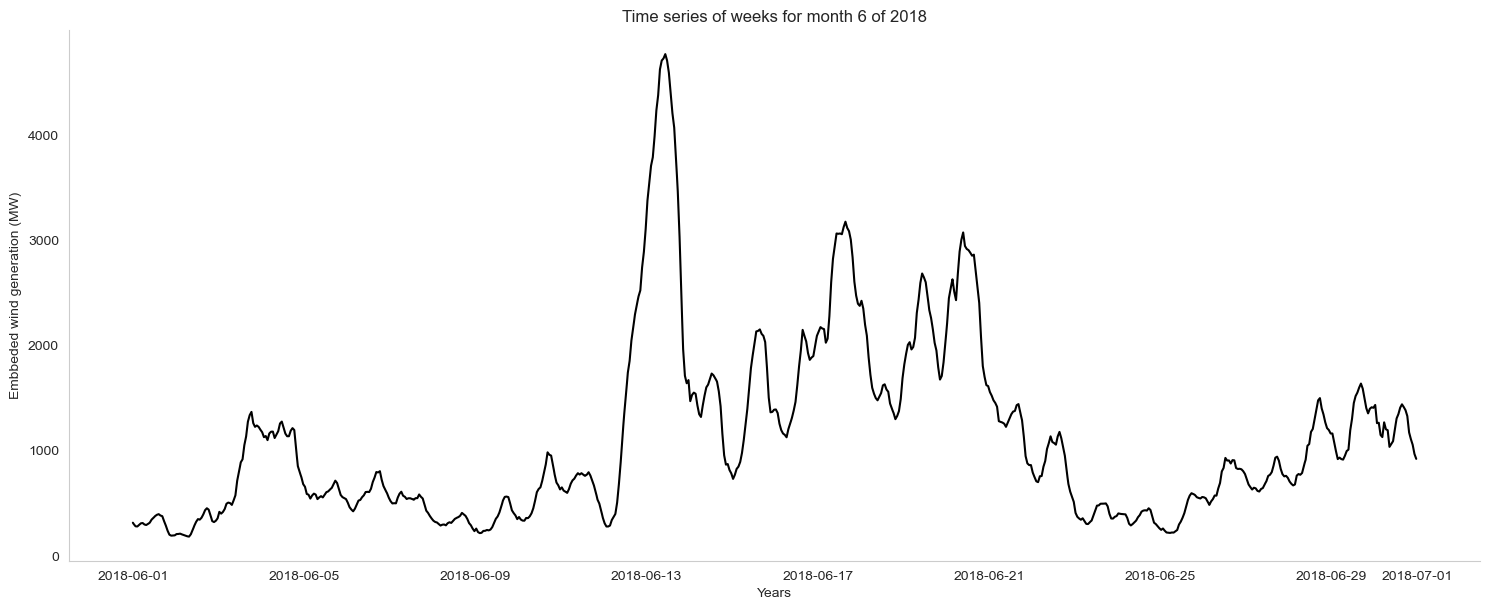

In [56]:
#Calling the funtion defined for demand to plot with chosen variable

plot_graph_for_demand('DATETIME','Embbeded wind generation (MW)',2018,6)

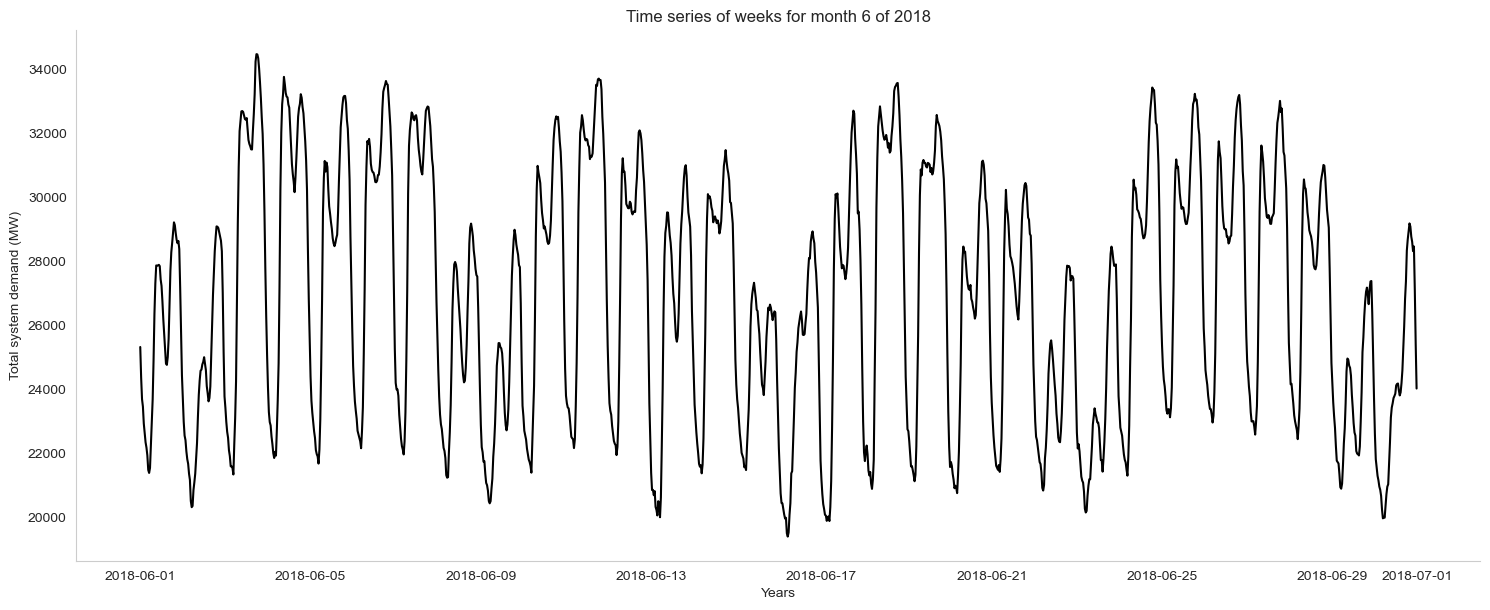

In [57]:
#Calling the funtion defined for demand to plot with chosen variable

plot_graph_for_demand('DATETIME','Total system demand (MW)',2018,6)

##### Plotting National demand and Total System demand time series 

## Loading the Market index data(MID: price & volume) 

In [58]:
MID=pd.read_sql('SELECT*from market$price$data_new',con=mysql_connection)

C:\Users\paulo\AppData\Local\Temp\ipykernel_12592\3497264627.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MID=pd.read_sql('SELECT*from market$price$data_new',con=mysql_connection)


In [59]:
#Dropping one of the dat providers to work only with the Australian exchange

MID1=MID.drop(MID[MID['MARKET_INDEX_DATA_PROVIDER']=='N2EXMIDP'].index)

In [60]:
#Checking the dataframe atributes

MID1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165646 entries, 0 to 331338
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   SETTLEMENT_DATE             165646 non-null  datetime64[ns]
 1   SETTLEMENT_PERIOD           165646 non-null  object        
 2   MARKET_INDEX_DATA_PROVIDER  165646 non-null  object        
 3   MARKET_INDEX_VOLUME         165646 non-null  object        
 4   MARKET_INDEX_PRICE          165646 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 7.6+ MB


In [61]:
#Dropping unnecessary column

MIDa=MID1.drop('MARKET_INDEX_DATA_PROVIDER',axis=1)

In [62]:
#Renaming the columns

MID2= MIDa.rename(columns={'SETTLEMENT_PERIOD':'Settlement Period','SETTLEMENT_DATE':'Settlement date','MARKET_INDEX_PRICE':'Market Index Price (£/MWh)','MARKET_INDEX_VOLUME':'Market Index Volume (MWh)'})

In [63]:
#Converting  columns to float 32 

columns_to_convert = ['Market Index Price (£/MWh)','Market Index Volume (MWh)']

for column in columns_to_convert:
    MID2[column] = pd.to_numeric(MID2[column], errors='coerce').astype('float32')

In [64]:
#Converting columns from object to string and integer

MID2['Settlement date']=MID2['Settlement date'].astype(str)
MID2['Settlement Period']=pd.to_numeric(MID2['Settlement Period'],errors='coerce').astype('Int64')

In [65]:
#Checking the new converted column types

MID2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165646 entries, 0 to 331338
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Settlement date             165646 non-null  object 
 1   Settlement Period           165646 non-null  Int64  
 2   Market Index Volume (MWh)   165646 non-null  float32
 3   Market Index Price (£/MWh)  165646 non-null  float32
dtypes: Int64(1), float32(2), object(1)
memory usage: 5.2+ MB


In [66]:
#creating a new column with DATETIME 
from datetime import datetime

#Applying new date format using lambda function to a columns
MID2['date']=MID2['Settlement date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
MID2['Time Interval'] = (MID2['Settlement Period']-1) * 30

MID2['date'] = MID2['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
import datetime
MID2['Time Format'] = MID2['Time Interval'].apply(lambda x:(datetime.datetime.min + datetime.timedelta(minutes=x)).time())

In [67]:
#Creating new datetime column with new format using lambda function

MID2['Time Format'] = MID2['Time Format'].apply(lambda x: x.strftime('%H:%M:%S'))
MID2['DATETIME'] = pd.to_datetime(MID2['date'] + ' ' + MID2['Time Format'])
MID2['Time Format'] = MID2['Time Interval'].apply(lambda x:(datetime.datetime.min + datetime.timedelta(minutes=x)).time())

In [68]:
#Creating new variable by grouping features of the dataframe using the new datime column as ID column

MIDF = MID2.groupby('DATETIME').agg({'Settlement Period': 'first',
                                                   'Market Index Price (£/MWh)': 'sum', 
                                                   'Market Index Volume (MWh)': 'sum'}).reset_index()

In [69]:
#Checking the first 20 elements of the new dataframe

MIDF.tail(20)

,DATETIME,Settlement Period,Market Index Price (£/MWh),Market Index Volume (MWh)
165148,2023-06-13 14:00:00,29,80.690002,3103.600098
165149,2023-06-13 14:30:00,30,79.500000,3602.949951
165150,2023-06-13 15:00:00,31,90.610001,2692.399902
165151,2023-06-13 15:30:00,32,89.620003,2493.899902
165152,2023-06-13 16:00:00,33,85.449997,2436.050049
165153,2023-06-13 16:30:00,34,95.699997,2353.350098
165154,2023-06-13 17:00:00,35,96.309998,2018.699951
165155,2023-06-13 17:30:00,36,94.620003,1852.099976
165156,2023-06-13 18:00:00,37,107.459999,1758.099976
165157,2023-06-13 18:30:00,38,110.730003,1885.849976


#### selecting data from 2014 to 2023

In [70]:
#Choosing time range start and end

mk_start =pd.to_datetime('2014-01-01 00:00:00')
mk_end = pd.to_datetime('2023-01-01 23:30:00')

In [71]:
#Creating an new dataframe using datetime and time range boundaries

MID2014_2023=MIDF[(MIDF['DATETIME']>=mk_start) & (MIDF['DATETIME']<=mk_end)]

In [72]:
# Checking and Counting the null values per column

n_mask2=MID2014_2023.isnull()
num_nan_per_col2= n_mask2.sum()
print("Number of NaN values per column:")
print(num_nan_per_col2)

Number of NaN values per column:
DATETIME                      0
Settlement Period             0
Market Index Price (£/MWh)    0
Market Index Volume (MWh)     0
dtype: int64


In [73]:
#Checking the last 48 elements of the dataframe

MID2014_2023.tail(48)

,DATETIME,Settlement Period,Market Index Price (£/MWh),Market Index Volume (MWh)
157296,2023-01-01 00:00:00,1,62.480000,635.650024
157297,2023-01-01 00:30:00,2,103.419998,557.099976
157298,2023-01-01 01:00:00,3,122.099998,593.700012
157299,2023-01-01 01:30:00,4,52.750000,784.450012
157300,2023-01-01 02:00:00,5,33.500000,641.700012
157301,2023-01-01 02:30:00,6,18.340000,535.299988
157302,2023-01-01 03:00:00,7,-20.280001,490.200012
157303,2023-01-01 03:30:00,8,-31.600000,450.200012
157304,2023-01-01 04:00:00,9,-25.430000,387.799988
157305,2023-01-01 04:30:00,10,-1.610000,557.400024


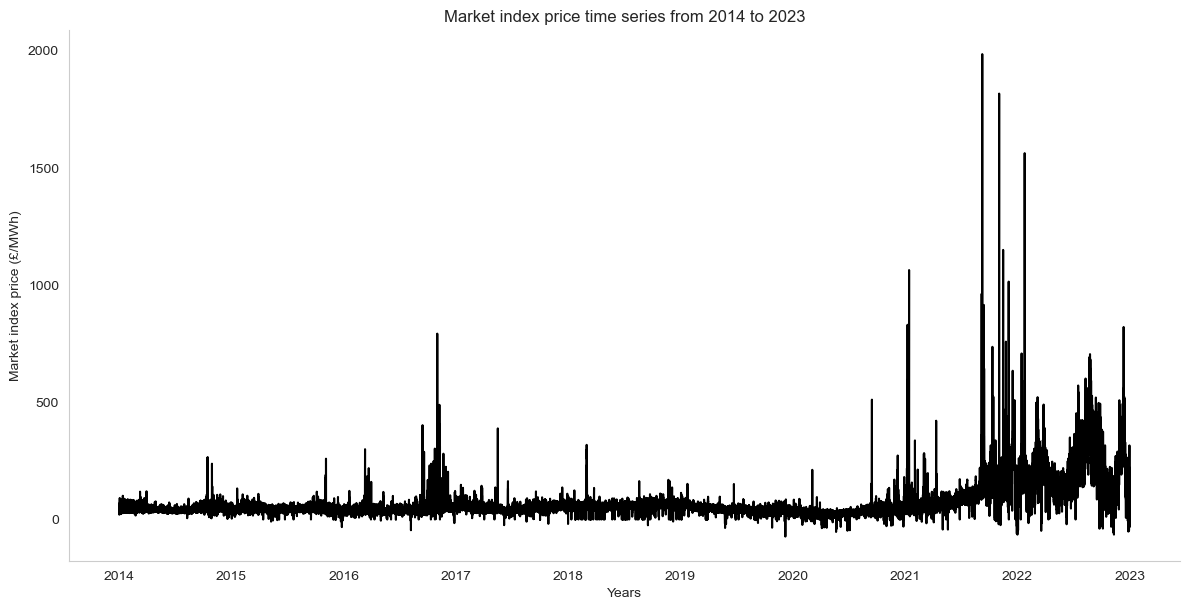

In [74]:
#Plotting time series of variable of the market index data using relplot from seaborn library

sn.relplot(data=MID2014_2023, x='DATETIME', y="Market Index Price (£/MWh)", kind="line",height=6, aspect=2,color='black')
plt.title('Market index price time series from 2014 to 2023')
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('Market index price (£/MWh)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

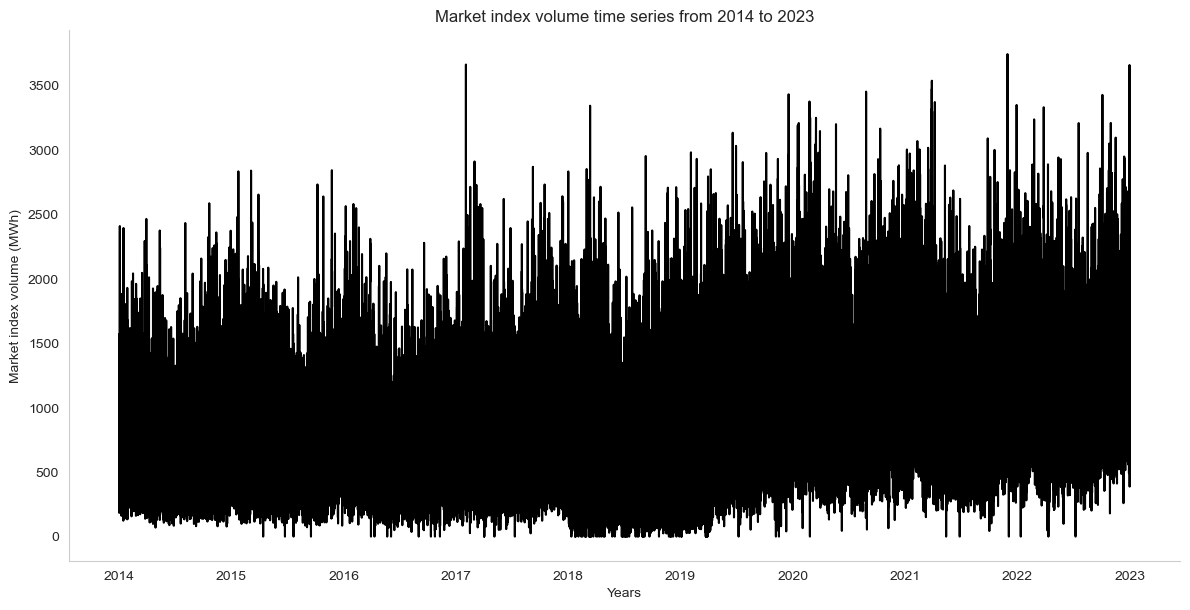

In [75]:
#Plotting time series of variable of market index data using relplot from seaborn library

sn.relplot(data=MID2014_2023, x="DATETIME", y="Market Index Volume (MWh)", kind="line",color='black',height=6, aspect=2)
plt.grid(False)
plt.title('Market index volume time series from 2014 to 2023')
plt.xlabel('Years')
plt.ylabel('Market index volume (MWh)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

In [76]:
#Defining a function to plot weeks per month line plots for variables on MID dataframe

def plot_graph_for_MID(x_col, y_col, year, month):
   
    # Filter the data for the specified year and month
    data_month = MID2014_2023[(MID2014_2023[x_col].dt.year == year) & (MID2014_2023[x_col].dt.month == month)]

    # Set seaborn style
    #sn.set(style='darkgrid')

    # Create a figure and axes
    #fig, ax = plt.subplots(figsize = figsize)
    
    

    # Plot the graph
    sn.relplot(x=data_month[x_col], y=data_month[y_col],kind="line",color='black',height=6, aspect=2.5,errorbar=None,)

    # Set plot title and axis labels

    plt.title(f'Time series of weeks for month {month} of {year}')
    plt.grid(False)
    plt.xlabel('Years')
    plt.ylabel(y_col)
    plt.savefig("random.jpg", facecolor="k")

    # Display the plot
    plt.show()

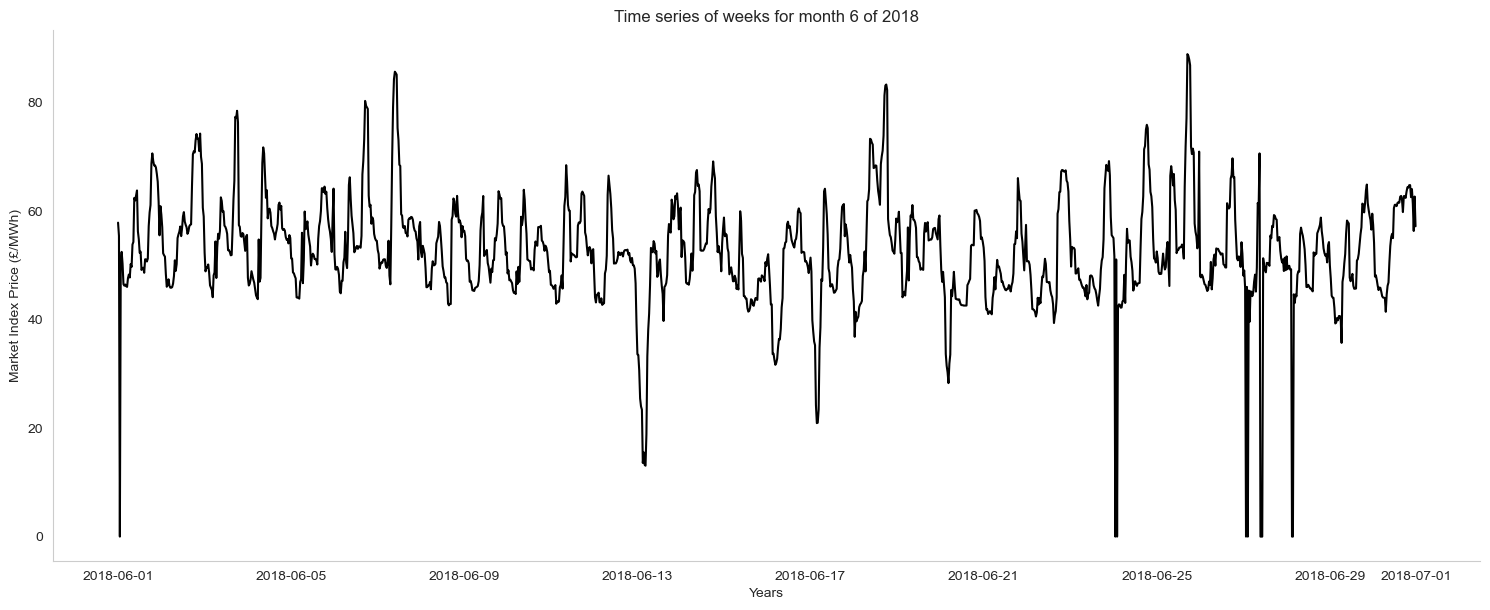

In [77]:
#Calling the funtion defined for market index data to plot with chosen variable

plot_graph_for_MID('DATETIME',"Market Index Price (£/MWh)",2018,6)

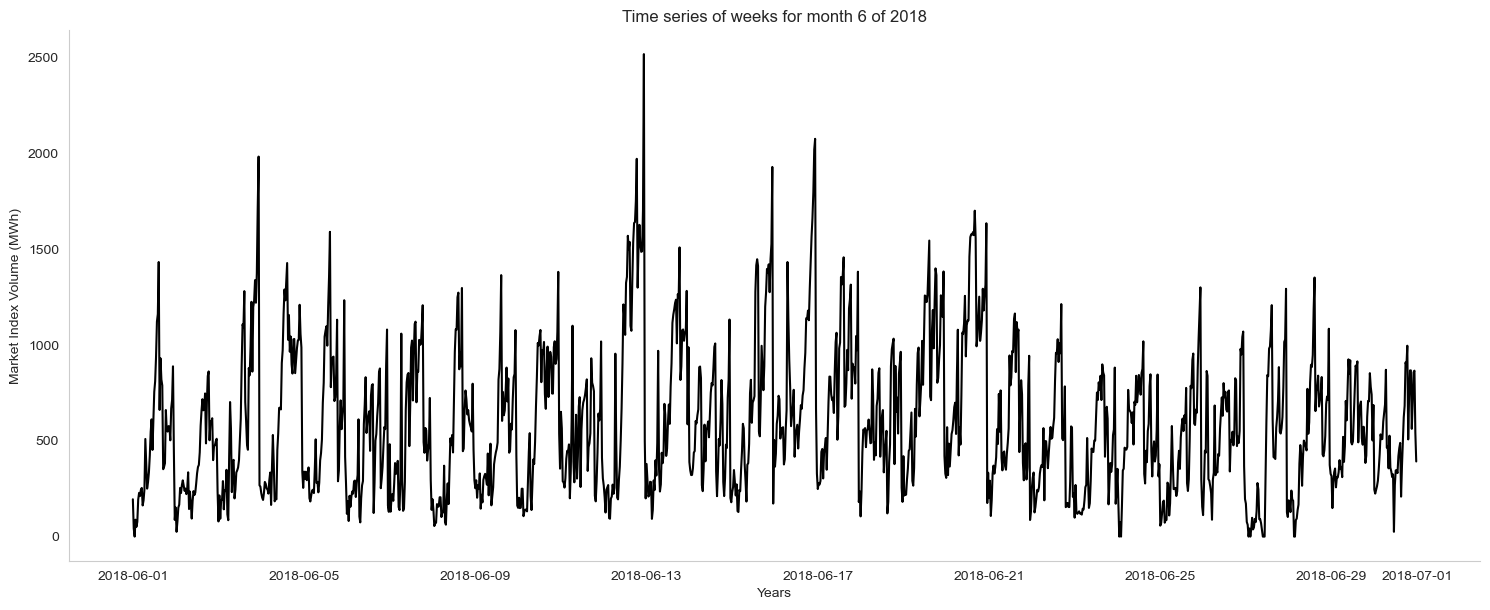

In [78]:
#Calling the funtion defined for market index data to plot with chosen variable

plot_graph_for_MID('DATETIME',"Market Index Volume (MWh)",2018,6)

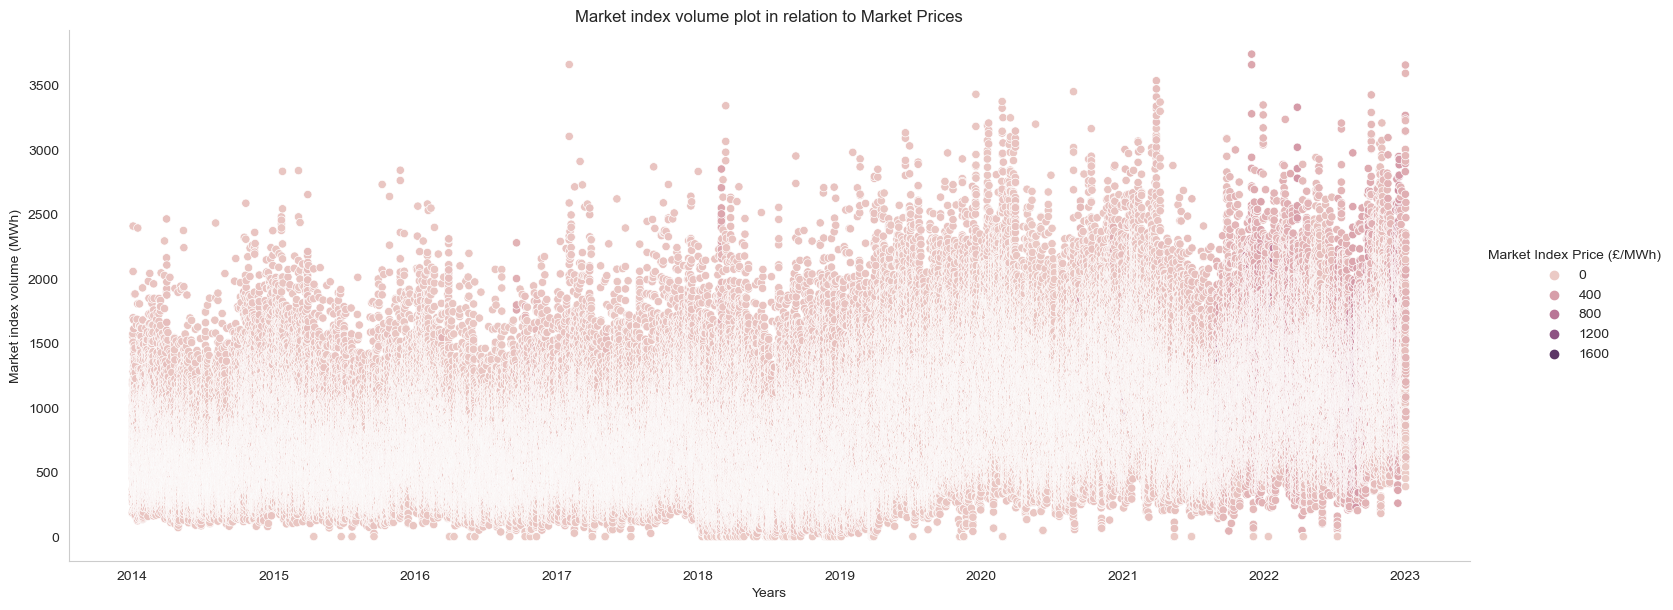

In [79]:
#Plotting combined variables of market index data using relplot from seaborn library

sn.relplot(data=MID2014_2023, x='DATETIME', y='Market Index Volume (MWh)', hue='Market Index Price (£/MWh)',height=6, aspect=2.5)

# Displaying the plot
plt.grid(False)
plt.title('Market index volume plot in relation to Market Prices')
plt.ylabel('Market index volume (MWh)')
plt.xlabel('Years')
plt.savefig("random.jpg", facecolor="k")
plt.show()

### Loading System sell and buy prices data

In [80]:
SBP=pd.read_excel(r"C:\Users\paulo\Downloads\Final_Project\Final_Project\.spyproject\Codes\SSPSBPdata\SBP.xlsx")

In [81]:
#Dropping unnecessary columns

SBP1=SBP.drop(['Run','Run2','SBP Daily Average(£/Mwh)'],axis=1)

In [82]:
#Transposing whole excel data and storing into new varaible to create dataframe

SBPa= SBP1.melt(id_vars='Date',var_name= 'Settlement_Period',value_name='System Buy Price(GBP/MWh)')

SBP2 = SBPa.sort_values(by=['Date','Settlement_Period']).reset_index(drop=True)

In [83]:
#Renaming the variable

SBP2.rename(columns={'Date':'Settlement date'},inplace=True)

In [84]:
#Converting variables

SBP2['Settlement date']=SBP2['Settlement date'].astype(str)
SBP2['Settlement Period']=pd.to_numeric(SBP2['Settlement_Period'],errors='coerce').astype('Int64')

In [85]:
#Importing library to create new column DATETIME
from datetime import datetime

#Applying new date format using lambda function to a columns
SBP2['date']=SBP2['Settlement date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
SBP2['Time Interval'] = (SBP2['Settlement_Period']-1) * 30

SBP2['date'] = SBP2['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
import datetime
SBP2['Time Format'] = SBP2['Time Interval'].apply(lambda x:(datetime.datetime.min + datetime.timedelta(minutes=x)).time())

In [86]:
#Creating new datetime column with new format using lambda function

SBP2['Time Format'] = SBP2['Time Format'].apply(lambda x: x.strftime('%H:%M:%S'))
SBP2['DATETIME'] = pd.to_datetime(SBP2['date'] + ' ' + SBP2['Time Format'])
SBP2['Time Format'] = SBP2['Time Interval'].apply(lambda x:(datetime.datetime.min + datetime.timedelta(minutes=x)).time())

In [87]:
#Creating new variable by grouping features of the dataframe using the new datime column as ID column

SBP3 = SBP2.groupby('DATETIME').agg({'Settlement Period': 'first',
                                                   'System Buy Price(GBP/MWh)': 'sum'}).reset_index()

In [88]:
#Checking new dataframe first 20 elements

SBP3.head(20)

,DATETIME,Settlement Period,System Buy Price(GBP/MWh)
0,2001-03-27 00:00:00,1,20.975
1,2001-03-27 00:30:00,2,19.588
2,2001-03-27 01:00:00,3,22.610
3,2001-03-27 01:30:00,4,38.089
4,2001-03-27 02:00:00,5,33.678
5,2001-03-27 02:30:00,6,39.835
6,2001-03-27 03:00:00,7,28.287
7,2001-03-27 03:30:00,8,38.182
8,2001-03-27 04:00:00,9,24.440
9,2001-03-27 04:30:00,10,30.535


#### selecting data from 2014 to 2023

In [89]:
#Creating start time and end time range
sbp_start =pd.to_datetime('2014-01-01 00:00:00')
sbp_end = pd.to_datetime('2023-01-01 23:30:00')

#Creating new dataframe using start and end boundaries and storing in a new variable
SBPf= SBP3[(SBP3['DATETIME'] >= sbp_start) & (SBP3['DATETIME'] <= sbp_end)]

In [90]:
#Coverting column to float 32 type

SBPf['System Buy Price(GBP/MWh)']= pd.to_numeric(SBPf['System Buy Price(GBP/MWh)'], errors='coerce').astype('float32')

C:\Users\paulo\AppData\Local\Temp\ipykernel_12592\3475593335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SBPf['System Buy Price(GBP/MWh)']= pd.to_numeric(SBPf['System Buy Price(GBP/MWh)'], errors='coerce').astype('float32')


In [91]:
# Checking and Counting the null values per column

n_mask3=SBPf.isnull()
num_nan_per_col3= n_mask3.sum()
print("Number of NaN values per column:")
print(num_nan_per_col3)

Number of NaN values per column:
DATETIME                     0
Settlement Period            0
System Buy Price(GBP/MWh)    0
dtype: int64


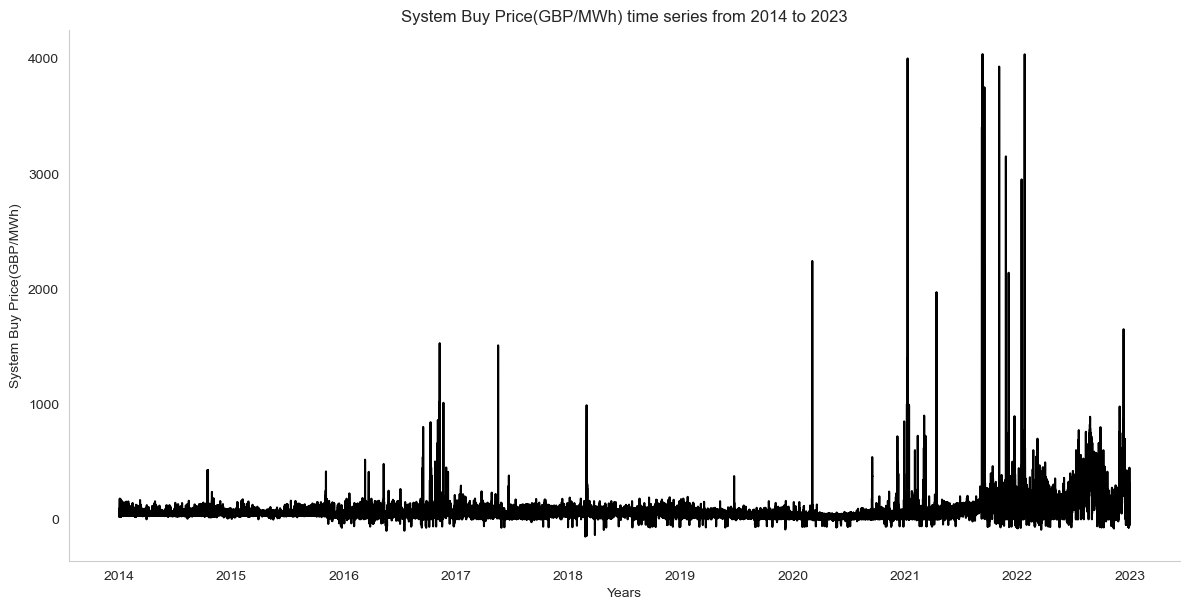

In [92]:
#Plotting time series of system buy price variable index data using relplot from seaborn library

sn.relplot(data=SBPf, x='DATETIME', y='System Buy Price(GBP/MWh)', kind="line",height=6, aspect=2,color='black')
plt.title('System Buy Price(GBP/MWh) time series from 2014 to 2023')
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('System Buy Price(GBP/MWh)')
plt.savefig("random.jpg", facecolor="k")
plt.show()

In [93]:
#Defining a function to plot weeks per month line plots for variables on SBPf dataframe

def plot_graph_for_SBPf(x_col, y_col, year, month):
    # Filter the data for the specified year and month
    data_month =SBPf[(SBPf[x_col].dt.year == year) & (SBPf[x_col].dt.month == month)]

    

    # Plot the graph
    sn.relplot(x=data_month[x_col], y=data_month[y_col],kind="line",color='black',height=6, aspect=2.5,errorbar=None,)

    # Set plot title and axis labels
   
    plt.title(f'Time series of weeks for month {month} of {year}')
    plt.grid(False)
    plt.xlabel('Years')
    plt.ylabel(y_col)
    plt.savefig("random.jpg", facecolor="k")

    # Display the plot
    plt.show()

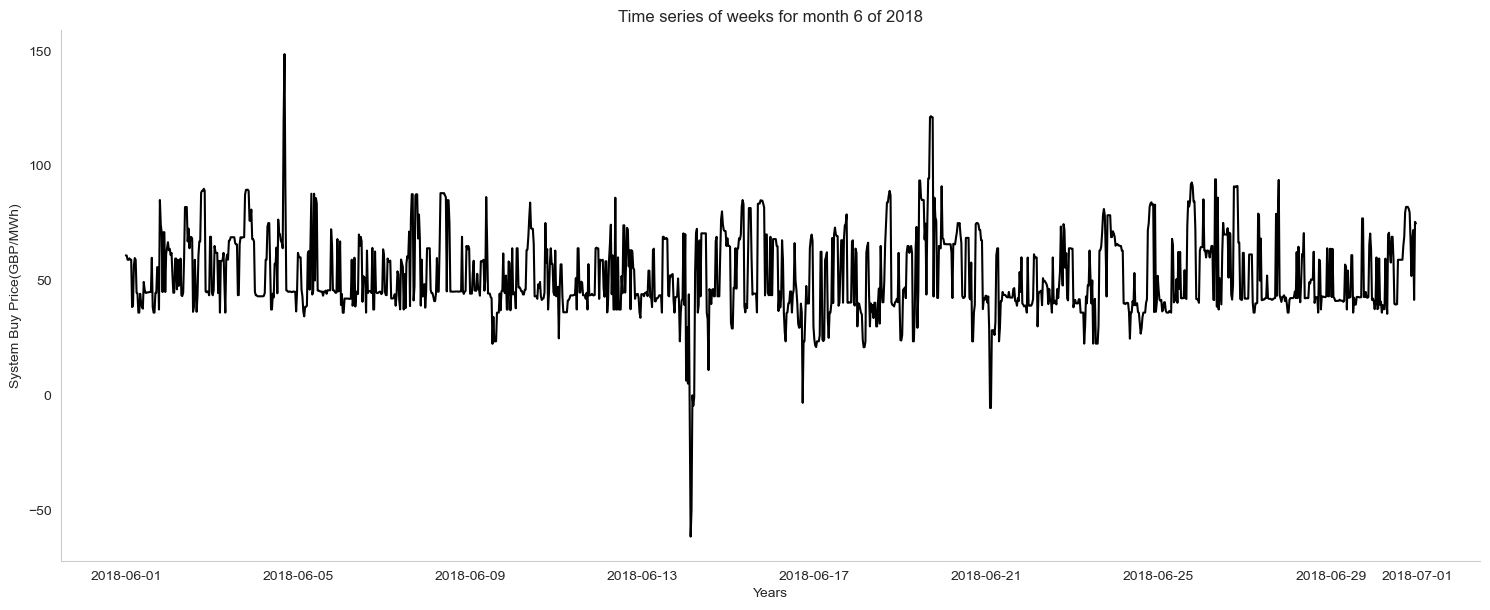

In [94]:
#Calling the funtion defined for SBPf data to plot with chosen variable

plot_graph_for_SBPf("DATETIME",'System Buy Price(GBP/MWh)',2018,6)

In [95]:
# Checking and Counting the null values per column
n_mask3a=SBPf.isnull()
num_nan_per_col3a= n_mask3a.sum()
print("Number of NaN values per column:")
print(num_nan_per_col3a)

Number of NaN values per column:
DATETIME                     0
Settlement Period            0
System Buy Price(GBP/MWh)    0
dtype: int64


In [96]:
#Checking dataframe atributes

SBPf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157824 entries, 223824 to 381647
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DATETIME                   157824 non-null  datetime64[ns]
 1   Settlement Period          157824 non-null  Int64         
 2   System Buy Price(GBP/MWh)  157824 non-null  float32       
dtypes: Int64(1), datetime64[ns](1), float32(1)
memory usage: 8.4 MB


In [97]:
#Checking dataframe atributes

Demand2014_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157530 entries, 0 to 157529
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   DATETIME                        157530 non-null  datetime64[ns]
 1   Settlement Period               157530 non-null  Int64         
 2   National demand (MW)            157530 non-null  float32       
 3   Embbeded wind generation (MW)   157530 non-null  float32       
 4   Embbeded solar generation (MW)  157530 non-null  float32       
 5   Total system demand (MW)        157530 non-null  float32       
dtypes: Int64(1), datetime64[ns](1), float32(4)
memory usage: 10.2 MB


In [98]:
#Checking dataframe atributes

MID2014_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157344 entries, 0 to 157343
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   DATETIME                    157344 non-null  datetime64[ns]
 1   Settlement Period           157344 non-null  Int64         
 2   Market Index Price (£/MWh)  157344 non-null  float32       
 3   Market Index Volume (MWh)   157344 non-null  float32       
dtypes: Int64(1), datetime64[ns](1), float32(2)
memory usage: 9.0 MB


In [99]:
#Checking dataframe atributes

Sources2014_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157824 entries, 87648 to 245471
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DATETIME                 157824 non-null  datetime64[ns]
 1   Wind generation (MW)     157824 non-null  float32       
 2   Solar generation (MW)    157824 non-null  float32       
 3   Hydro generation (MW)    157824 non-null  float32       
 4   Biomass generation (MW)  157824 non-null  float32       
dtypes: datetime64[ns](1), float32(4)
memory usage: 8.8 MB


## Creating data table with all variables

In [100]:
#Using merge function to join the first two datframes

DataTable1= pd.merge(SBPf,MID2014_2023,on='DATETIME',how='inner')

In [101]:
#Checking the first five elements of the new dataframe

DataTable1.head(5)

,DATETIME,Settlement Period_x,System Buy Price(GBP/MWh),Settlement Period_y,Market Index Price (£/MWh),Market Index Volume (MWh)
0,2014-01-01 00:00:00,1,54.157001,1,35.320000,301.500000
1,2014-01-01 00:30:00,2,55.499001,2,37.279999,365.649994
2,2014-01-01 01:00:00,3,56.230999,3,41.500000,184.000000
3,2014-01-01 01:30:00,4,52.896999,4,36.740002,185.149994
4,2014-01-01 02:00:00,5,32.040001,5,32.040001,283.500000


In [102]:
#Checking the length of the data

len(DataTable1)

157344

In [103]:
#Using merge function to join the new dataframe with the next one

DataTable2= pd.merge(DataTable1,Demand2014_2023,on='DATETIME',how='inner')

In [104]:
#Checking the length of the data

len(DataTable2)

157338

In [105]:
#Checking the first five elements of the new dataframe

DataTable2.head(5)

,DATETIME,Settlement Period_x,System Buy Price(GBP/MWh),Settlement Period_y,Market Index Price (£/MWh),Market Index Volume (MWh),Settlement Period,National demand (MW),Embbeded wind generation (MW),Embbeded solar generation (MW),Total system demand (MW)
0,2014-01-01 00:00:00,1,54.157001,1,35.320000,301.500000,1,30008.0,1084.0,0.0,31920.0
1,2014-01-01 00:30:00,2,55.499001,2,37.279999,365.649994,2,30589.0,1079.0,0.0,32491.0
2,2014-01-01 01:00:00,3,56.230999,3,41.500000,184.000000,3,30306.0,1079.0,0.0,32521.0
3,2014-01-01 01:30:00,4,52.896999,4,36.740002,185.149994,4,29280.0,931.0,0.0,31735.0
4,2014-01-01 02:00:00,5,32.040001,5,32.040001,283.500000,5,28174.0,931.0,0.0,30661.0


In [106]:
#Using merge function one more time to join the new dataframe with the last dataframe to form the final table with all chosen features

Table=pd.merge(DataTable2,Sources2014_2023,on='DATETIME',how='inner')

In [107]:
#Checking the final Table dataframe

Table.head()

,DATETIME,Settlement Period_x,System Buy Price(GBP/MWh),Settlement Period_y,Market Index Price (£/MWh),Market Index Volume (MWh),Settlement Period,National demand (MW),Embbeded wind generation (MW),Embbeded solar generation (MW),Total system demand (MW),Wind generation (MW),Solar generation (MW),Hydro generation (MW),Biomass generation (MW)
0,2014-01-01 00:00:00,1,54.157001,1,35.320000,301.500000,1,30008.0,1084.0,0.0,31920.0,4469.0,0.0,768.0,0.0
1,2014-01-01 00:30:00,2,55.499001,2,37.279999,365.649994,2,30589.0,1079.0,0.0,32491.0,4601.0,0.0,767.0,0.0
2,2014-01-01 01:00:00,3,56.230999,3,41.500000,184.000000,3,30306.0,1079.0,0.0,32521.0,4686.0,0.0,708.0,0.0
3,2014-01-01 01:30:00,4,52.896999,4,36.740002,185.149994,4,29280.0,931.0,0.0,31735.0,4774.0,0.0,716.0,0.0
4,2014-01-01 02:00:00,5,32.040001,5,32.040001,283.500000,5,28174.0,931.0,0.0,30661.0,4670.0,0.0,702.0,0.0


In [108]:
#Checking the length of the data

len(Table)

157338

In [109]:
#Dropping unwanted reapeted columns

Table.drop(['Settlement Period_x','Settlement Period_y'],axis=1,inplace=True)

In [110]:
# Checking and Counting the values equal to zero per column

solar_mask=Table['Solar generation (MW)']==0
solar_p= solar_mask.sum()
print("Number of solar values equal to zero:")
print(solar_p)

Number of solar values equal to zero:
77767


In [111]:
# Checking and Counting the values equal to zero per column
wind_mask=Table['Wind generation (MW)']==0
wind_p= wind_mask.sum()
print("Number of wind values equal to zero:")
print(wind_p)

Number of wind values equal to zero:
0


In [112]:
# Checking and Counting the values equal to zero per column
h_mask=Table['Hydro generation (MW)']==0
h_p= h_mask.sum()
print("Number of hydro values equal to zero:")
print(h_p)

Number of hydro values equal to zero:
65


In [113]:
# Checking and Counting the values equal to zero per column
b_mask=Table['Biomass generation (MW)']==0
b_p= b_mask.sum()
print("Number of biomass values equal to zero:")
print(b_p)

Number of biomass values equal to zero:
67010


In [114]:
# Checking and Counting the values equal to zero per column
maskf=Table['Embbeded wind generation (MW)']==0
f_p= maskf.sum()
print("Number of Embbeded wind gen values equal to zero:")
print(f_p)

Number of Embbeded wind gen values equal to zero:
0


In [115]:
# Checking and Counting the values equal to zero per column
maskg=Table['Embbeded solar generation (MW)']==0
g_p= maskf.sum()
print("Number of Embbeded solar gen values equal to zero:")
print(g_p)

Number of Embbeded solar gen values equal to zero:
0


In [116]:
#Displaying the stats summary of table's variables

Table.describe()

,System Buy Price(GBP/MWh),Market Index Price (£/MWh),Market Index Volume (MWh),Settlement Period,National demand (MW),Embbeded wind generation (MW),Embbeded solar generation (MW),Total system demand (MW),Wind generation (MW),Solar generation (MW),Hydro generation (MW),Biomass generation (MW)
count,157338.000000,157338.000000,157338.000000,157338.0,157338.000000,157338.000000,157338.000000,157338.000000,157338.000000,157338.000000,157338.000000,157338.000000
mean,69.568436,67.778709,872.352844,24.499123,29932.853516,1501.433960,1175.537231,31373.070312,5688.662109,1157.449951,418.494019,1110.033325
std,89.782135,70.828407,479.337952,13.852979,7182.784180,972.260681,1869.287964,6932.190430,4067.088379,1870.588501,254.493698,1077.196167
min,-150.000000,-72.839996,0.000000,1.0,13367.000000,83.000000,0.000000,16629.000000,103.000000,0.000000,0.000000,0.000000
25%,32.630001,35.509998,504.962509,12.0,24318.000000,731.000000,0.000000,26018.000000,2432.000000,0.000000,208.000000,0.000000
50%,46.000000,44.639999,784.099976,24.0,29218.000000,1282.000000,23.000000,30561.000000,4734.000000,3.000000,386.000000,1127.000000
75%,70.000000,62.560001,1157.199951,36.0,34847.750000,2070.000000,1810.000000,35899.000000,7925.000000,1739.000000,594.000000,2083.000000
max,4037.800049,1983.660034,3743.350098,48.0,79138.000000,5634.000000,13060.000000,80820.000000,20912.000000,9892.000000,1403.000000,3262.000000


### Data transformation to absolute values, to ensure that all the positional negative numbers become positive and do not affect the model

In [117]:
#Taking absolute values of the columns with positional negative values

Table['System Buy Price(GBP/MWh)']=Table['System Buy Price(GBP/MWh)'].abs()
Table['Market Index Price (£/MWh)']=Table['Market Index Price (£/MWh)'].abs()

In [118]:
#Checking total number of null values per columns

msk=Table.isnull()
num_nan_per_co= msk.sum()
print("Number of NaN values per column:")
print(num_nan_per_co)

Number of NaN values per column:
DATETIME                          0
System Buy Price(GBP/MWh)         0
Market Index Price (£/MWh)        0
Market Index Volume (MWh)         0
Settlement Period                 0
National demand (MW)              0
Embbeded wind generation (MW)     0
Embbeded solar generation (MW)    0
Total system demand (MW)          0
Wind generation (MW)              0
Solar generation (MW)             0
Hydro generation (MW)             0
Biomass generation (MW)           0
dtype: int64


In [119]:
#Displaying the stats summary of table's variables after applying abs() funtion to columns

Table.describe()

,System Buy Price(GBP/MWh),Market Index Price (£/MWh),Market Index Volume (MWh),Settlement Period,National demand (MW),Embbeded wind generation (MW),Embbeded solar generation (MW),Total system demand (MW),Wind generation (MW),Solar generation (MW),Hydro generation (MW),Biomass generation (MW)
count,157338.000000,157338.000000,157338.000000,157338.0,157338.000000,157338.000000,157338.000000,157338.000000,157338.000000,157338.000000,157338.000000,157338.000000
mean,70.108925,67.942780,872.352844,24.499123,29932.853516,1501.433960,1175.537231,31373.070312,5688.662109,1157.449951,418.494019,1110.033325
std,89.361053,70.670906,479.337952,13.852979,7182.784180,972.260681,1869.287964,6932.190430,4067.088379,1870.588501,254.493698,1077.196167
min,0.000000,0.000000,0.000000,1.0,13367.000000,83.000000,0.000000,16629.000000,103.000000,0.000000,0.000000,0.000000
25%,32.939999,35.522500,504.962509,12.0,24318.000000,731.000000,0.000000,26018.000000,2432.000000,0.000000,208.000000,0.000000
50%,46.116501,44.650002,784.099976,24.0,29218.000000,1282.000000,23.000000,30561.000000,4734.000000,3.000000,386.000000,1127.000000
75%,70.119001,62.567500,1157.199951,36.0,34847.750000,2070.000000,1810.000000,35899.000000,7925.000000,1739.000000,594.000000,2083.000000
max,4037.800049,1983.660034,3743.350098,48.0,79138.000000,5634.000000,13060.000000,80820.000000,20912.000000,9892.000000,1403.000000,3262.000000


### Plotting correlation matrix

In [120]:
corr_matrix=Table.corr()

C:\Users\paulo\AppData\Local\Temp\ipykernel_12592\3587373422.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=Table.corr()


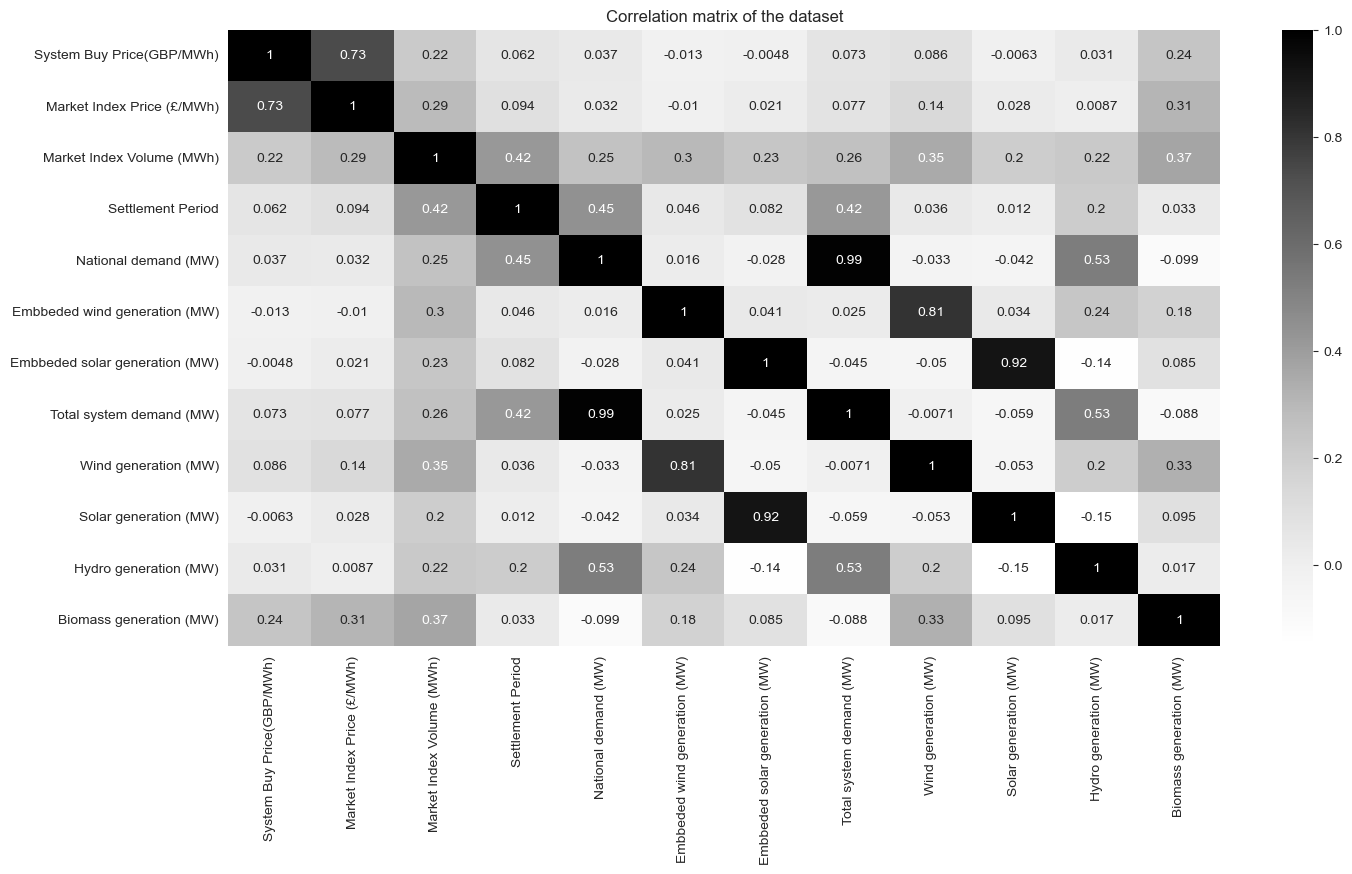

In [121]:
#Setting figure size
fig, ax = plt.subplots(figsize=(16, 8))

#Plotting the matrix
sn.heatmap(corr_matrix,annot=True,cmap='Greys')

#setting title and saving figure
ax.set_title('Correlation matrix of the dataset')
plt.savefig("random.jpg", facecolor="k")
plt.show()

### Final Table will be exported to CSV file to execute yearly models in other notebooks

In [122]:
#exporting data frame to a CSV

#Giving filename and path where the CSV file will be saved
file_path=r"C:\Users\paulo\Downloads\Final_Project\Table2014_2023F.csv"

In [123]:
# Export the DataFrame to CSV
Table.to_csv(file_path, index=False)

In [124]:
#Checking exported table

Table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157338 entries, 0 to 157337
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   DATETIME                        157338 non-null  datetime64[ns]
 1   System Buy Price(GBP/MWh)       157338 non-null  float32       
 2   Market Index Price (£/MWh)      157338 non-null  float32       
 3   Market Index Volume (MWh)       157338 non-null  float32       
 4   Settlement Period               157338 non-null  Int64         
 5   National demand (MW)            157338 non-null  float32       
 6   Embbeded wind generation (MW)   157338 non-null  float32       
 7   Embbeded solar generation (MW)  157338 non-null  float32       
 8   Total system demand (MW)        157338 non-null  float32       
 9   Wind generation (MW)            157338 non-null  float32       
 10  Solar generation (MW)           157338 non-null  float32